<img src="https://www.dropbox.com/s/khilhltn1p6olrc/plexus3.png?raw=1" />


##Propuesta Barceló: POC Asistente de respuestas a reviews a través de IA para BHG##
**Plexus Data Technologies**<br>
<br>
- ***Fecha: 21-Febrero-2019*** 

**Nota**: Este notebook ya muestra los resultados de la ejecución del código. Es necesario un tiempo aproximado de 1h para una nueva ejecución completa.

###1.0. Introducción y Objetivo

####1.1. Objetivo.
Desarrollo de una aplicación/solución IA que proporcione respuestas a las opiniones dejadas por los usuarios de los hoteles Barceló en las webs de calificación.

####1.2. Requisitos.

- El modelo/solución debe sugerir una o varias respuestas, así como dar la precisión en la predicción (solo se sugiere una respuesta en esta POC).
- Solo se gestionarán las reviews positivas y neutras.
- Debe ser capaz de entender español e inglés como idiomas mínimos, valorándose otros idiomas (solo se ha empleado inglés para esta POC).
- Debe existir la posibilidad de que el GEM pueda editar la respuesta seleccionada.
- El modelo proporcionará las respuestas siguiendo la guía de estilo dada por BHG.

####1.2. Obtención de datos.

- Guía de estilo de las respuestas proporcionadas por BHG
- Reviews y parejas review/respuesta obtenidas mediante un spider de **tripadvisor.com** para los siguientes 20 hoteles de BHG:
    - https://www.tripadvisor.com/Hotel_Review-g580293-d254860-Reviews-Barcelo_Illetas_Albatros-Calvia_Majorca_Balearic_Islands.html#REVIEWS
    - https://www.tripadvisor.com/Hotel_Review-g662296-d518379-Reviews-Occidental_Playa_de_Palma-Playa_de_Palma_Majorca_Balearic_Islands.html
    - https://www.tripadvisor.com/Hotel_Review-g580287-d289525-Reviews-Barcelo_Ponent_Playa-Cala_d_Or_Majorca_Balearic_Islands.html#REVIEWS
    - https://www.tripadvisor.com/Hotel_Review-g187497-d1083206-Reviews-Barcelo_Raval-Barcelona_Catalonia.html#REVIEWS
    - https://www.tripadvisor.com/Hotel_Review-g147293-d149213-Reviews-Barcelo_Bavaro_Beach_Adults_Only-Punta_Cana_La_Altagracia_Province_Dominican_Republic.html#REVIEWS
    - https://www.tripadvisor.com/Hotel_Review-g187514-d10847573-Reviews-Barcelo_Torre_de_Madrid-Madrid.html#REVIEWS
    - https://www.tripadvisor.com/Hotel_Review-g187497-d228507-Reviews-Barcelo_Sants-Barcelona_Catalonia.html#REVIEWS
    - https://www.tripadvisor.com/Hotel_Review-g673853-d282610-Reviews-Barcelo_Santiago-Puerto_de_Santiago_Tenerife_Canary_Islands.html#REVIEWS
    - https://www.tripadvisor.com/Hotel_Review-g187438-d650588-Reviews-Barcelo_Malaga-Malaga_Costa_del_Sol_Province_of_Malaga_Andalucia.html#REVIEWS
    - https://www.tripadvisor.com/Hotel_Review-g187454-d228497-Reviews-Barcelo_Bilbao_Nervion-Bilbao_Province_of_Vizcaya_Basque_Country.html#REVIEWS
    - https://www.tripadvisor.com/Hotel_Review-g673869-d282609-Reviews-Barcelo_Hamilton_Menorca-Es_Castell_Menorca_Balearic_Islands.html#REVIEWS
    - https://www.tripadvisor.com/Hotel_Review-g658907-d237059-Reviews-Barcelo_Castillo_Beach_Resort-Caleta_de_Fuste_Antigua_Fuerteventura_Canary_Islands.html#REVIEWS
    - https://www.tripadvisor.com/Hotel_Review-g658907-d255145-Reviews-Barcelo_Fuerteventura_Thalasso_Spa-Caleta_de_Fuste_Antigua_Fuerteventura_Canary_Islands.html#REVIEWS
    - https://www.tripadvisor.com/Hotel_Review-g187439-d487082-Reviews-Barcelo_Marbella-Marbella_Costa_del_Sol_Province_of_Malaga_Andalucia.html#REVIEWS
    - https://www.tripadvisor.com/Hotel_Review-g1913086-d573836-Reviews-Barcelo_Cabo_de_Gata-El_Toyo_Province_of_Almeria_Andalucia.html#REVIEWS
    - https://www.tripadvisor.com/Hotel_Review-g187443-d228627-Reviews-Barcelo_Sevilla_Renacimiento-Seville_Province_of_Seville_Andalucia.html#REVIEWS
    - https://www.tripadvisor.com/Hotel_Review-g187457-d238669-Reviews-Barcelo_Costa_Vasca-San_Sebastian_Donostia_Province_of_Guipuzcoa_Basque_Country.html#REVIEWS
    - https://www.tripadvisor.com/Hotel_Review-g580322-d678447-Reviews-Barcelo_Corralejo_Bay-Corralejo_La_Oliva_Fuerteventura_Canary_Islands.html#REVIEWS
    - https://www.tripadvisor.com/Hotel_Review-g783945-d557197-Reviews-Occidental_Jandia_Mar-Pajara_Jandia_Peninsula_Fuerteventura_Canary_Islands.html#REVIEWS
    - https://www.tripadvisor.com/Hotel_Review-g659633-d284532-Reviews-Occidental_Lanzarote_Mar-Costa_Teguise_Lanzarote_Canary_Islands.html#REVIEWS
    - https://www.tripadvisor.com/Hotel_Review-g562819-d287443-Reviews-Occidental_Margaritas-Playa_del_Ingles_Maspalomas_Gran_Canaria_Canary_Islands.html#REVIEWS

####1.3. Esquema del proceso.

<img src="https://www.dropbox.com/s/q291rzcfe9r724l/esquema_POC3.jpg?raw=1" />

####2.0. Lectura del fichero csv que contiene las reviews:
Se realiza la lectura del fichero que contiene las parejas **review/respuesta** obtenidas mediante un extractor de datos de **tripadvisor.com**. Se creará un dataframe para el estudio y entreno de los modelos de predicción y un dataframe con reiews no vistas por los modelos para predecir su respuesta y poder valorar los resultados.

In [4]:
# Carga de librerías
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover, CountVectorizer
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
from pyspark.ml.feature import HashingTF, IDF, Tokenizer
from pyspark.ml.feature import NGram, VectorAssembler
from pyspark.ml.feature import ChiSqSelector
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml import Pipeline
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
import pyspark.sql.functions as F
from pyspark.sql.types import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import string
import re


##############reviews/Respuesta###############
# Creación del schema reviews_topic_labeled_df_schema
reviews_df_schema = StructType([
 StructField('review_text', StringType()),
 StructField('response_text', StringType()),
 StructField('rating', DoubleType()),
 StructField('department', StringType()),
 StructField('topic', StringType())
])

# Lectura del csv review_labeled aplicando el reviews_topic_labeled_df_schema
reviews_df = spark.read.format('com.databricks.spark.csv')                                                                                \
              .options(inferSchema=False, delimiter = ';', nullValue='NA', header=True, encoding='UTF-8')                                 \
              .schema(reviews_df_schema)                                                                                                  \
              .load('/FileStore/tables/reviews_10.csv')                                                                                   \
              .withColumn('response_text', lower(col('response_text')))                                                                   \
              .withColumn('review_text', lower(col('review_text')))                                                                       \
              .withColumn('response_text', trim(col('response_text')))                                                                    \
              .withColumn('review_text', trim(col('review_text'))) \
              .withColumn('department', trim(col('department'))) \
              .withColumn('topic', trim(col('topic'))) \
              .dropna()

# Filtrado de reviews positivas y neutras
#reviews_df = reviews_df.filter(reviews_df.department != 'Employee')

reviews_df.show(4)
print("Number of departments: " + str(reviews_df.select('department').distinct().count()))
print("Number of topic: " + str(reviews_df.select('topic').distinct().count()))
print("Number of reviews: " + str(reviews_df.count()))

+--------------------+--------------------+------+----------+------+
 review_text| response_text|rating|department| topic|
+--------------------+--------------------+------+----------+------+
two families with...|dear guestthank y...| 50.0|Gastronomy|buffet|
this is a massive...|dear guestthank y...| 40.0|Gastronomy|buffet|
we spent 10 glori...|dear guestwe woul...| 50.0|Gastronomy|buffet|
our trip was amaz...|dear guestthank y...| 40.0|Gastronomy|buffet|
+--------------------+--------------------+------+----------+------+
only showing top 4 rows

Number of departments: 2
Number of topic: 6
Number of reviews: 7270

#####2.1. Obtención de reviews sencillas (no complejas):

Creación de una nueva columna "lenght" con el número de caracteres de las reviews. Para esta POC solo se emplearan las reviews consideradas como simples o no complejas como aquellas cuya longintud en número de caracteres sea menor de 800 caracteres:

In [6]:
# Creación de la columna lenght
reviews_df = reviews_df.withColumn('lenght', F.length('review_text'))

 # Reviews lenght less than 800
print("Reviews lenght < 800 count: " + str(reviews_df.where(reviews_df.lenght <= 800).count()))

# Reviews lenght more than 800
print("Reviews lenght > 800 count: " + str(reviews_df.where(reviews_df.lenght > 800).count()))

# % Reviews sencillas
print ("% Reviews sencillas: {0:.4f}".format((reviews_df.where(reviews_df.lenght <= 800).count() / (float(reviews_df.count()))*100)))
      
# % Reviews sencillas
print ("% Reviews complejas: {0:.4f}".format(100 - (reviews_df.where(reviews_df.lenght <= 800).count() / (float(reviews_df.count()))*100)))

# Filtrado de reviews simples 
reviews_df = reviews_df.filter(reviews_df.lenght <= 800).drop('lenght')

Reviews lenght < 800 count: 4426
Reviews lenght > 800 count: 2844
% Reviews sencillas: 60.8803
% Reviews complejas: 39.1197

#####2.2. Normalización de las reviews.

Se realizan las operaciones de normalización de las reviews. Eliminación de puntuación, saltos de línea, números y caracteres especiales.

In [8]:
# Función eliminar puntuación
def remove_punct(text):
    regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]')
    nopunct = regex.sub(" ", text)  
    return nopunct

punct_remover = udf(lambda x: remove_punct(x))

# Ejecución funcción punct_remover sobre campo review
reviews_df_cleaned = reviews_df.select(punct_remover('review_text'), 'department', 'topic', 'rating')

# Renombrado y eliminación columnas
reviews_df_cleaned = reviews_df_cleaned.withColumnRenamed('<lambda>(review_text)', 'review_text')\
                                                     .withColumn('review_text', trim(col('review_text'))) \
                                                     .limit(1000000)
reviews_df_cleaned.show(4, truncate=100)

+----------------------------------------------------------------------------------------------------+----------+------+------+
 review_text|department| topic|rating|
+----------------------------------------------------------------------------------------------------+----------+------+------+
two families with year old girls stayed here for days we had so much fun food drinks pools...|Gastronomy|buffet| 50.0|
second time we have come here last time was years ago food is good and staff is friendly i...|Gastronomy|buffet| 40.0|
pro beautiful beachfront property breathtaking views long walks clean beach plenty of palm tree ...|Gastronomy|buffet| 40.0|
my wife and l loved this resort the stall treated us like family the pool was wonderful and we ...|Gastronomy|buffet| 50.0|
+----------------------------------------------------------------------------------------------------+----------+------+------+
only showing top 4 rows

#####2.3. Creación de dataframe de reviews para test final (no vistas por los modelos):

Creación de un dataframe con 12 parejas reviews para test final. Se crearan un dataframe que contenta reviews para todos los topics incluidos dentro de los departaments "Room" y "Gastronomy".

In [10]:
# Filtrado de las reviews para department = Room
room_bed = reviews_df_cleaned.filter((reviews_df_cleaned.department == 'Room') \
                                                      & (reviews_df_cleaned.topic == 'bed') \
                                                      & (reviews_df_cleaned.rating >= 40)).limit(2)

room_room = reviews_df_cleaned.filter((reviews_df_cleaned.department == 'Room') \
                                                      & (reviews_df_cleaned.topic == 'room') \
                                                      & (reviews_df_cleaned.rating >= 40)).limit(2)

room_size = reviews_df_cleaned.filter((reviews_df_cleaned.department == 'Room') \
                                                      & (reviews_df_cleaned.topic == 'size') \
                                                      & (reviews_df_cleaned.rating >= 40)).limit(2)


# Filtrado de las reviews para department = Gastronomy 
gastronomy_buffet = reviews_df_cleaned.filter((reviews_df_cleaned.department == 'Gastronomy') \
                                                      & (reviews_df_cleaned.topic == 'buffet') \
                                                      & (reviews_df_cleaned.rating > 40)).limit(2)

gastronomy_dinner = reviews_df_cleaned.filter((reviews_df_cleaned.department == 'Gastronomy') \
                                                      & (reviews_df_cleaned.topic == 'dinner') \
                                                      & (reviews_df_cleaned.rating >= 40)).limit(2)

gastronomy_temperature = reviews_df_cleaned.filter((reviews_df_cleaned.department == 'Gastronomy') \
                                                      & (reviews_df_cleaned.topic == 'temperature') \
                                                      & (reviews_df_cleaned.rating >= 40)).limit(2)
# Union dataframe
reviews_test_df = room_bed.union(room_room) \
                             .union(room_size) \
                             .union(gastronomy_buffet) \
                             .union(gastronomy_dinner) \
                             .union(gastronomy_temperature)

# Substracción de las revieews para test final
reviews_df_cleaned = reviews_df_cleaned.exceptAll(reviews_test_df)

# Comprobación de la substracción
print("reviews_df_cleaned count: " + str(reviews_df_cleaned.count()))

reviews_test_df.show()

reviews_df_cleaned count: 4414
+--------------------+----------+-----------+------+
 review_text|department| topic|rating|
+--------------------+----------+-----------+------+
my husband some f...| Room| bed| 50.0|
this stay has bee...| Room| bed| 50.0|
my wife i staye...| Room| room| 50.0|
this resort is hu...| Room| room| 50.0|
excellent hotel f...| Room| size| 40.0|
we stayed here fo...| Room| size| 40.0|
two families with...|Gastronomy| buffet| 50.0|
my wife and l lov...|Gastronomy| buffet| 50.0|
service was excel...|Gastronomy| dinner| 50.0|
my husband and i ...|Gastronomy| dinner| 50.0|
just had a good h...|Gastronomy|temperature| 40.0|
this visit certai...|Gastronomy|temperature| 50.0|
+--------------------+----------+-----------+------+

#### 3.0. Lectura de los ficheros csv que contienen las respuestas de la guía de estilo:
A partir de la guía de estilo proporcionadas por BHG, se han creado 3 archivos csv correspondientes al **inicio**, **cuerpo** y **cierre** de las respuestas proporcionadas a las reviews. Se crean 3 dataframes correspondientes a la lectura de los archivos inicio, cuerpo y cierre:

In [12]:
##############Inicio###############
# Creación del schema inicio para el dataframe
inicio_df_schema = StructType(
[StructField('type', StringType()),
 StructField('begin_text', StringType()),
])

# Lectura del dataset inico aplicando el inicio_df_schema
inicio_df = spark.read.format('com.databricks.spark.csv')                                                                         \
              .options(inferSchema=False, delimiter = ';', nullValue='NA', header=True, multiLine=True, encoding='UTF-8')         \
              .schema(inicio_df_schema)                                                                                           \
              .load('/FileStore/tables/inicio.csv')                                                                               \
              .withColumn('begin_text', lower(col('begin_text')))                                                                 \
              .withColumn('begin_text', trim(col('begin_text')))

##############Cuerpo###############
# Creación del schema cuerpo para el dataframe
cuerpo_df_schema = StructType([
 StructField('department', StringType()),
 StructField('topic', StringType()),
 StructField('type', StringType()),
 StructField('body_text', StringType())
])

# Lectura del dataset cuerpo aplicando el cuerpo_df_schema
cuerpo_df = spark.read.format('com.databricks.spark.csv')                                                                         \
              .options(inferSchema=False, delimiter = ';', nullValue='NA', header=True, multiLine=True, encoding='UTF-8')         \
              .schema(cuerpo_df_schema)                                                                                           \
              .load('/FileStore/tables/topic_2_categories.csv')                                                                   \
              .withColumn('body_text', lower(col('body_text')))                                                                   \
              .withColumn('body_text', trim(col('body_text')))

##############Cierre###############
# Creación del schema cierre para el dataframe
cierre_df_schema = StructType(
[StructField('type', StringType()),
 StructField('close_text', StringType()),
])

# Lectura del dataset cierre aplicando el cierre_df_schema
cierre_df = spark.read.format('com.databricks.spark.csv')                                                                         \
              .options(inferSchema=False, delimiter = ';', nullValue='NA', header=True, multiLine=True, encoding='UTF-8')         \
              .schema(cierre_df_schema)                                                                                           \
              .load('/FileStore/tables/cierre.csv')                                                                               \
              .withColumn('close_text', lower(col('close_text')))                                                                 \
              .withColumn('close_text', trim(col('close_text')))  

inicio_df.show(4, truncate=50)
cuerpo_df.show(4, truncate=50)
cierre_df.show(4, truncate=50)
print("department count: " + str(cuerpo_df.select('department').distinct().count()))

+--------+--------------------------------------------------+
 type| begin_text|
+--------+--------------------------------------------------+
Positive|firstly we would like to thank you for the love...|
Positive|thank you very much for sharing this great revi...|
Positive|first and foremost we would like to thank you f...|
Positive|thank you for sharing your feedback on your rec...|
+--------+--------------------------------------------------+
only showing top 4 rows

+----------+------+--------+--------------------------------------------------+
department| topic| type| body_text|
+----------+------+--------+--------------------------------------------------+
Gastronomy|buffet|Positive|we also greatly appreciate your comments on the...|
Gastronomy|buffet| Neutral|at barcelo we know that meals are an important ...|
Gastronomy|buffet|Positive|last but not least, it fills us with pride that...|
Gastronomy|buffet|Positive|it is also good to know that you enjoyed the ma...|
+----------+------+--------+--------------------------------------------------+
only showing top 4 rows

+--------+--------------------------------------------------+
 type| close_text|
+--------+--------------------------------------------------+
Positive|we are thrilled you enjoyed your recent stay wi...|
Positive|thank you again for this heartwarming review of...|
Positive|again we thank you for this wonderful review, i...|
Positive|again we thank you for this very kind review of...|
+--------+--------------------------------------------------+
only showing top 4 rows

department count: 2

#####3.1. Creación de un dataframe **respuestas_tipo_df** con la unión de los dataframes inicio, cuerpo y cierre:

In [14]:
# Union datadrames inicio, cuerpo y cierre
respuestas_tipo_df = inicio_df.join(cuerpo_df, "type").join(cierre_df, "type").select('department', 'topic','type', 'begin_text', 'body_text', 'close_text')
respuestas_tipo_df.show(4, truncate=30)

# Creación de un dataframe para el agrupamiento por department
reviews_df_grouped = reviews_df.groupBy('department').count().sort(desc('count'))
reviews_df_grouped.show(4)

spark.catalog.dropTempView("table4")
respuestas_tipo_df.createTempView('table4')

+----------+-----+--------+------------------------------+------------------------------+------------------------------+
department|topic| type| begin_text| body_text| close_text|
+----------+-----+--------+------------------------------+------------------------------+------------------------------+
 Room| size|Positive|firstly we would like to th...|we are also grateful for yo...|on behalf of our entire tea...|
 Room| size|Positive|firstly we would like to th...|we are also grateful for yo...|thank you again for your gr...|
 Room| size|Positive|firstly we would like to th...|we are also grateful for yo...|we hope to welcome you back...|
 Room| size|Positive|firstly we would like to th...|we are also grateful for yo...|once more we thank you for ...|
+----------+-----+--------+------------------------------+------------------------------+------------------------------+
only showing top 4 rows

+----------+-----+
department|count|
+----------+-----+
Gastronomy| 2296|
 Room| 2130|
+----------+-----+

####4.0. Modelo 1: Predección de "department" en base a "review_text":

#####4.1. Procesamiento del Texto.

Se realizan las operaciones necesaria para el procesamiento del lenguaje natural empleando dos métodos:
- Count Vector Features
- TF-IDF Features

In [17]:
###### Count Vector Features######
# Tokenization, Remove Stop Words y Count vectors:
# regular expression tokenizer
regexTokenizer = RegexTokenizer(inputCol="review_text", outputCol="words", pattern="\\W")

add_stopwords = sc.textFile('/FileStore/tables/stopwords3.txt').collect()
stopwordsRemover = StopWordsRemover(inputCol="words", outputCol="filtered").setStopWords(add_stopwords)
  
# bag of words count
countVectors = CountVectorizer(inputCol="filtered", outputCol="features", vocabSize=10000, minDF=5)

# Label indexed and pipeline
label_stringIdx_department = StringIndexer(inputCol = "department", outputCol = "label").setHandleInvalid("keep")
pipeline_department = Pipeline(stages=[regexTokenizer, stopwordsRemover, countVectors, label_stringIdx_department])

# Fit the pipeline to training documents.
pipelineFitCV_department = pipeline_department.fit(reviews_df_cleaned)
dataset_countVector_department = pipelineFitCV_department.transform(reviews_df_cleaned)
dataset_countVector_department.show(4)


#######TF-IDF####
# HashingTF and IDF to transformation
# Add HashingTF and IDF to transformation
hashingTF = HashingTF(inputCol="filtered", outputCol="rawFeatures", numFeatures=10000)
idf = IDF(inputCol="rawFeatures", outputCol="features", minDocFreq=5)

# Redo Pipeline
pipelineIDF_department = Pipeline(stages=[regexTokenizer, stopwordsRemover, hashingTF, idf, label_stringIdx_department])

pipelineFitIDF_department = pipelineIDF_department.fit(reviews_df_cleaned)
datasetIDF_department = pipelineFitIDF_department.transform(reviews_df_cleaned)
datasetIDF_department.show(4)

+--------------------+----------+------+------+--------------------+--------------------+--------------------+-----+
 review_text|department| topic|rating| words| filtered| features|label|
+--------------------+----------+------+------+--------------------+--------------------+--------------------+-----+
this is a quiet ...|Gastronomy|buffet| 40.0|[this, is, a, qui...|[quiet, layed, ba...|(2593,[1,4,6,13,2...| 0.0|
we were halfboard...|Gastronomy|buffet| 50.0|[we, were, halfbo...|[halfboard, room,...|(2593,[1,2,4,13,1...| 0.0|
our third visit t...|Gastronomy|buffet| 40.0|[our, third, visi...|[third, visit, la...|(2593,[2,3,4,5,9,...| 0.0|
first time visit ...|Gastronomy|buffet| 50.0|[first, time, vis...|[first, time, vis...|(2593,[0,1,3,4,7,...| 0.0|
+--------------------+----------+------+------+--------------------+--------------------+--------------------+-----+
only showing top 4 rows

+--------------------+----------+------+------+--------------------+--------------------+--------------------+--------------------+-----+
 review_text|department| topic|rating| words| filtered| rawFeatures| features|label|
+--------------------+----------+------+------+--------------------+--------------------+--------------------+--------------------+-----+
this is a quiet ...|Gastronomy|buffet| 40.0|[this, is, a, qui...|[quiet, layed, ba...|(10000,[8,128,277...|(10000,[8,128,277...| 0.0|
we were halfboard...|Gastronomy|buffet| 50.0|[we, were, halfbo...|[halfboard, room,...|(10000,[1,494,505...|(10000,[1,494,505...| 0.0|
our third visit t...|Gastronomy|buffet| 40.0|[our, third, visi...|[third, visit, la...|(10000,[1,26,165,...|(10000,[1,26,165,...| 0.0|
first time visit ...|Gastronomy|buffet| 50.0|[first, time, vis...|[first, time, vis...|(10000,[26,87,161...|(10000,[26,87,161...| 0.0|
+--------------------+----------+------+------+--------------------+--------------------+--------------------+--------------------+-----+
only showing top 4 rows

#####4.2. Creación del dataframe code_label_department_df (label asignada a cada department):
Creación de un dataframe con la label asignada a cada department tras haber aplicado la función **StringIndexer** en el preprocesado del texto anterior.

In [19]:
# Creación dataframe code_label_department_df
code_label_department_df = dataset_countVector_department.select('department', 'label'). distinct().sort(asc('label'))
code_label_department_df.show(4, truncate=50)

+----------+-----+
department|label|
+----------+-----+
Gastronomy| 0.0|
 Room| 1.0|
+----------+-----+

#####4.3. Empleo de diferentes modelos:
Para los modelos empleados se ha utilizado la validación cruzada. Los modelos solo muestran los valores óptimos obtenidos como hiperparámetros a modo de agilizar la ejecución de los modelos en posteriores ejecuciones.

#####4.3.1. Creación de conjuntos de entrenamiento y test para los modelos:

In [22]:
# Count vector method
(trainingDataCV_department, testDataCV_department) = dataset_countVector_department.randomSplit([0.8, 0.2], seed = 1234)
print("trainingDataCV_department Count: " + str(trainingDataCV_department.count()))
print("testDataCV_department Count: " + str(testDataCV_department.count()))

# Comprobación labels en dataset entrenamiento y test
print("trainingDataCV_department labels: " + str(trainingDataCV_department.select('label').distinct().count()))
print("testDataCV_department labels: " + str(testDataCV_department.select('label').distinct().count()))

# HashingTF and IDF method
(trainingDataIDF_department, testDataIDF_department) = datasetIDF_department.randomSplit([0.8, 0.2], seed = 1234)
print("trainingDataIDF_department Count: " + str(trainingDataIDF_department.count()))
print("testDataIDF_department Count: " + str(testDataIDF_department.count()))

# Comprobación labels en dataset entrenamiento y test
print("trainingDataIDF_department labels: " + str(trainingDataIDF_department.select('label').distinct().count()))
print("testDataIDF_department labels: " + str(testDataIDF_department.select('label').distinct().count()))

# Creación de lista para métricas
accuracy_models_department =[]

# Creación de lista para mejores modelos
best_models_department = []

trainingDataCV_department Count: 3570
testDataCV_department Count: 844
trainingDataCV_department labels: 2
testDataCV_department labels: 2
trainingDataIDF_department Count: 3570
testDataIDF_department Count: 844
trainingDataIDF_department labels: 2
testDataIDF_department labels: 2

#####4.3.2. Empleo de un modelo tipo: Logistic Regression - Count Vector Features con validación cruzada.

In [24]:
# Build the model
lrCV = LogisticRegression(labelCol='label')

# Create ParamGrid for Cross Validation
lr_paramGrid_cv = (ParamGridBuilder()
             .addGrid(lrCV.regParam, [0.1])
             .addGrid(lrCV.elasticNetParam, [0.3])            
             .addGrid(lrCV.maxIter, [50])                     
             .build())

# Create 5-fold CrossValidator
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
LRCV = CrossValidator(estimator=lrCV, \
                    estimatorParamMaps=lr_paramGrid_cv, \
                    evaluator=evaluator, \
                    numFolds=3)

# Run cross validations
LRModelCV = LRCV.fit(trainingDataCV_department)


# Ejecución sobre conjunto de test
predictionsLRCV = LRModelCV.transform(testDataCV_department)

# Predictions
predictionsLRCV.select("review_text","department","probability", "label","prediction") \
               .orderBy("probability", ascending=False) \
               .show(n = 4, truncate = 30)

# Evaluación modelo
accuracy_department = predictionsLRCV.filter(predictionsLRCV.label == predictionsLRCV.prediction).count() / float(testDataCV_department.count())
roc_auc_department = evaluator.evaluate(predictionsLRCV)
accuracy_models_department.append(accuracy_department)
best_models_department.append(LRModelCV)

# print accuracy, roc_auc
print ("Accuracy Score: {0:.4f}".format(accuracy_department))
print ("ROC-AUC: {0:.4f}".format(roc_auc_department))

+------------------------------+----------+------------------------------+-----+----------+
 review_text|department| probability|label|prediction|
+------------------------------+----------+------------------------------+-----+----------+
stayed in this hotel for ...|Gastronomy|[0.8918150093724029,0.10817...| 0.0| 0.0|
a very clean hotel with fri...|Gastronomy|[0.8810360738725278,0.11895...| 0.0| 0.0|
i just want to say this is ...|Gastronomy|[0.8810360738725278,0.11895...| 0.0| 0.0|
firstly have to say what ha...|Gastronomy|[0.8681443571004498,0.13184...| 0.0| 0.0|
+------------------------------+----------+------------------------------+-----+----------+
only showing top 4 rows

Accuracy Score: 0.7263
ROC-AUC: 0.7808

#####4.3.3. Empleo de un modelo tipo: Logistic Regression - TF-IDF Features con validación cruzada.

In [26]:
# Build the model
lrIDF = LogisticRegression(labelCol='label')

# Create ParamGrid for Cross Validation
lr_paramGrid_idf = (ParamGridBuilder()
             .addGrid(lrIDF.regParam, [0.1])
             .addGrid(lrIDF.elasticNetParam, [0.3]) 
             .addGrid(lrIDF.maxIter, [30]) 
             .build())

# Create 5-fold CrossValidator
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
LRIDF = CrossValidator(estimator=lrIDF, \
                    estimatorParamMaps=lr_paramGrid_idf, \
                    evaluator=evaluator, \
                    numFolds=3)

# Run cross validations
LRModelIDF = LRIDF.fit(trainingDataIDF_department)

# Ejecución sobre conjunto de test
predictionsLRIDF = LRModelIDF.transform(testDataIDF_department)

# Predictions
predictionsLRIDF.select("review_text","department","probability", "label","prediction") \
                .orderBy("probability", ascending=False) \
                .show(n = 4, truncate = 30)

# Evaluación modelo
accuracy_department = predictionsLRIDF.filter(predictionsLRIDF.label == predictionsLRIDF.prediction).count() / float(testDataIDF_department.count())
roc_auc_department = evaluator.evaluate(predictionsLRIDF)
accuracy_models_department.append(accuracy_department)
best_models_department.append(LRModelIDF)

# print accuracy, roc_auc
print ("Accuracy Score: {0:.4f}".format(accuracy_department))
print ("ROC-AUC: {0:.4f}".format(roc_auc_department))

+------------------------------+----------+------------------------------+-----+----------+
 review_text|department| probability|label|prediction|
+------------------------------+----------+------------------------------+-----+----------+
stayed in this hotel for ...|Gastronomy|[0.8944404252846093,0.10555...| 0.0| 0.0|
a very clean hotel with fri...|Gastronomy|[0.8781953549443525,0.12180...| 0.0| 0.0|
i just want to say this is ...|Gastronomy|[0.8773425008391472,0.12265...| 0.0| 0.0|
firstly have to say what ha...|Gastronomy|[0.8713105469639664,0.12868...| 0.0| 0.0|
+------------------------------+----------+------------------------------+-----+----------+
only showing top 4 rows

Accuracy Score: 0.7251
ROC-AUC: 0.7783

#####4.3.4. Empleo de un modelo tipo: Naive Bayes - Count Vectores Features con validación cruzada.

In [28]:
# Model
nbCV = NaiveBayes(modelType="multinomial")

# Create ParamGrid for Cross Validation
nb_paramGrid_cv = ParamGridBuilder().addGrid(nbCV.smoothing, [30.0]).build()

# Create 5-fold CrossValidator
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
NVCV = CrossValidator(estimator=nbCV, \
                    estimatorParamMaps=nb_paramGrid_cv, \
                    evaluator=evaluator, \
                    numFolds=3)

# Run cross validations
NVModelCV = NVCV.fit(trainingDataCV_department)

# Ejecución sobre conjunto de test
predictionsNVCV = NVModelCV.transform(testDataCV_department)

# Predictions
predictionsNVCV.select("review_text","department","probability", "label","prediction") \
               .orderBy("probability", ascending=False) \
               .show(n = 4, truncate = 30)

# Evaluación modelo
accuracy_department = predictionsNVCV.filter(predictionsNVCV.label == predictionsNVCV.prediction).count() / float(testDataCV_department.count())
roc_auc_department = evaluator.evaluate(predictionsNVCV)
accuracy_models_department.append(accuracy_department)
best_models_department.append(NVModelCV)

# print accuracy, roc_auc
print ("Accuracy Score: {0:.4f}".format(accuracy_department))
print ("ROC-AUC: {0:.4f}".format(roc_auc_department))

+------------------------------+----------+------------------------------+-----+----------+
 review_text|department| probability|label|prediction|
+------------------------------+----------+------------------------------+-----+----------+
stayed in this hotel for ...|Gastronomy|[0.9998489629447693,1.51037...| 0.0| 0.0|
good hotel for family time ...|Gastronomy|[0.999682367310049,3.176326...| 0.0| 0.0|
pools were great rooms wer...| Room|[0.9995006183738687,4.99381...| 1.0| 0.0|
we are just back from our ...|Gastronomy|[0.9988864829964669,0.00111...| 0.0| 0.0|
+------------------------------+----------+------------------------------+-----+----------+
only showing top 4 rows

Accuracy Score: 0.6789
ROC-AUC: 0.4901

#####4.3.5. Empleo de un modelo tipo: Naive Bayes - TF-IDF Features con validación cruzada.

In [30]:
# Model
nbIDF = NaiveBayes(modelType="multinomial")

# Create ParamGrid for Cross Validation
nb_paramGrid_idf = ParamGridBuilder().addGrid(nbIDF.smoothing, [30.0]).build()

# Create 5-fold CrossValidator
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
NVIDF = CrossValidator(estimator=nbIDF, \
                    estimatorParamMaps=nb_paramGrid_idf, \
                    evaluator=evaluator, \
                    numFolds=3)

# Run cross validations
NVModelIDF = NVIDF.fit(trainingDataIDF_department)

# Ejecución sobre conjunto de test
predictionsNVIDF = NVModelIDF.transform(testDataIDF_department)

# Predictions
predictionsNVIDF.select("review_text","department","probability", "label","prediction") \
                .orderBy("probability", ascending=False) \
                .show(n = 4, truncate = 30)

# Evaluación modelo
accuracy_department = predictionsNVIDF.filter(predictionsNVIDF.label == predictionsNVIDF.prediction).count() / float(testDataIDF_department.count())
roc_auc_department = evaluator.evaluate(predictionsNVIDF)
accuracy_models_department.append(accuracy_department)
best_models_department.append(NVModelIDF)

# print accuracy, roc_auc
print ("Accuracy Score: {0:.4f}".format(accuracy_department))
print ("ROC-AUC: {0:.4f}".format(roc_auc_department))

+------------------------------+----------+------------------------------+-----+----------+
 review_text|department| probability|label|prediction|
+------------------------------+----------+------------------------------+-----+----------+
we discovered dominican rep...|Gastronomy| [1.0,5.866633635917328E-17]| 0.0| 0.0|
just returned from the lanz...|Gastronomy| [1.0,6.571659821361941E-18]| 0.0| 0.0|
the rooms are very comforta...| Room| [1.0,2.074131823537173E-19]| 1.0| 0.0|
i just want to say this is ...|Gastronomy|[0.9999999999999996,3.75737...| 0.0| 0.0|
+------------------------------+----------+------------------------------+-----+----------+
only showing top 4 rows

Accuracy Score: 0.6244
ROC-AUC: 0.4911

#####4.3.6. Empleo de un modelo tipo: Decision Trees - Count Vectores Features con validación cruzada.

In [32]:
# Model
dtCV = DecisionTreeClassifier(labelCol="label", featuresCol="features")


# Grid de parámetros
dt_grid_cv = ParamGridBuilder() \
.addGrid(dtCV.maxDepth, [6]) \
.addGrid(dtCV.maxBins, [20]) \
.build()

# Create 5-fold CrossValidator
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
DTCV = CrossValidator(estimator=dtCV, \
                    estimatorParamMaps=dt_grid_cv, \
                    evaluator=evaluator, \
                    numFolds=3)

# Run cross validations
DTModelCV = DTCV.fit(trainingDataCV_department)

# Ejecución sobre conjunto de test
predictionsDTCV = DTModelCV.transform(testDataCV_department)

# Predictions
predictionsDTCV.select("review_text","department","probability", "label","prediction") \
               .orderBy("probability", ascending=False) \
               .show(n = 4, truncate = 30)

# Evaluación modelo
accuracy_department = predictionsDTCV.filter(predictionsDTCV.label == predictionsDTCV.prediction).count() / float(testDataCV_department.count())
roc_auc_department = evaluator.evaluate(predictionsDTCV)
accuracy_models_department.append(accuracy_department)
best_models_department.append(DTModelCV)

# print accuracy, roc_auc
print ("Accuracy Score: {0:.4f}".format(accuracy_department))
print ("ROC-AUC: {0:.4f}".format(roc_auc_department))

+------------------------------+----------+-------------+-----+----------+
 review_text|department| probability|label|prediction|
+------------------------------+----------+-------------+-----+----------+
we knew when we booked that...| Room|[1.0,0.0,0.0]| 1.0| 0.0|
came here for a chilled wee...| Room|[1.0,0.0,0.0]| 1.0| 0.0|
this was a very large hotel...| Room|[1.0,0.0,0.0]| 1.0| 0.0|
very good hotel very kind p...| Room|[1.0,0.0,0.0]| 1.0| 0.0|
+------------------------------+----------+-------------+-----+----------+
only showing top 4 rows

Accuracy Score: 0.6742
ROC-AUC: 0.6389

#####4.3.7. Empleo de un modelo tipo: Decision Trees - TF-IDF Features con validación cruzada.

In [34]:
# Model
dtIDF = DecisionTreeClassifier(labelCol="label", featuresCol="features")


# Grid de parámetros
dt_grid_idf = ParamGridBuilder() \
.addGrid(dtIDF.maxDepth, [6]) \
.addGrid(dtIDF.maxBins, [20]) \
.build()

# Create 5-fold CrossValidator
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
DTIDF = CrossValidator(estimator=dtIDF, \
                    estimatorParamMaps=dt_grid_idf, \
                    evaluator=evaluator, \
                    numFolds=3)

# Run cross validations
DTModelIDF = DTIDF.fit(trainingDataIDF_department)

# Use test set here so we can measure the accuracy of our model on new data
predictionsDTIDF = DTModelIDF.transform(testDataIDF_department)

# Predictions
predictionsDTIDF.select("review_text","department","probability", "label","prediction") \
                .orderBy("probability", ascending=False) \
                .show(n = 4, truncate = 30)

# Evaluación modelo
accuracy_department = predictionsDTIDF.filter(predictionsDTIDF.label == predictionsDTIDF.prediction).count() / float(testDataIDF_department.count())
roc_auc_department = evaluator.evaluate(predictionsDTIDF)
accuracy_models_department.append(accuracy_department)
best_models_department.append(DTModelIDF)

# print accuracy, roc_auc
print ("Accuracy Score: {0:.4f}".format(accuracy_department))
print ("ROC-AUC: {0:.4f}".format(roc_auc_department))

+------------------------------+----------+-------------+-----+----------+
 review_text|department| probability|label|prediction|
+------------------------------+----------+-------------+-----+----------+
we knew when we booked that...| Room|[1.0,0.0,0.0]| 1.0| 0.0|
this was a very large hotel...| Room|[1.0,0.0,0.0]| 1.0| 0.0|
came here for a chilled wee...| Room|[1.0,0.0,0.0]| 1.0| 0.0|
very good hotel very kind p...| Room|[1.0,0.0,0.0]| 1.0| 0.0|
+------------------------------+----------+-------------+-----+----------+
only showing top 4 rows

Accuracy Score: 0.6789
ROC-AUC: 0.6437

#####4.3.8. Empleo de un modelo tipo: Random Forest - Count Vectores Features con validación cruzada.

In [36]:
# Model
rfCV = RandomForestClassifier(labelCol="label", featuresCol="features")


# Grid de parámetros
rf_grid_cv = ParamGridBuilder() \
.addGrid(rfCV.numTrees, [20]) \
.addGrid(rfCV.maxDepth, [10]) \
.addGrid(rfCV.maxBins, [30]) \
.build()

# Create 5-fold CrossValidator
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
RFCV = CrossValidator(estimator=rfCV, \
                    estimatorParamMaps=rf_grid_cv, \
                    evaluator=evaluator, \
                    numFolds=3)

# Run cross validations
RFModelCV = RFCV.fit(trainingDataCV_department)

# Ejecución sobre conjunto de test
predictionsRFCV = RFModelCV.transform(testDataCV_department)

# Predictions
predictionsRFCV.select("review_text","department","probability", "label","prediction") \
               .orderBy("probability", ascending=False) \
               .show(n = 4, truncate = 30)

# Evaluación modelo
accuracy_department = predictionsRFCV.filter(predictionsRFCV.label == predictionsRFCV.prediction).count() / float(testDataCV_department.count())
roc_auc_department = evaluator.evaluate(predictionsRFCV)
accuracy_models_department.append(accuracy_department)
best_models_department.append(RFModelCV)

# print accuracy, roc_auc
print ("Accuracy Score: {0:.4f}".format(accuracy_department))
print ("ROC-AUC: {0:.4f}".format(roc_auc_department))

+------------------------------+----------+------------------------------+-----+----------+
 review_text|department| probability|label|prediction|
+------------------------------+----------+------------------------------+-----+----------+
hotel was lovely the enter...|Gastronomy|[0.7221773327377006,0.27782...| 0.0| 0.0|
if you want a family holida...| Room|[0.7122864851464568,0.28771...| 1.0| 0.0|
my wife and i have recently...|Gastronomy|[0.7064553316181369,0.29354...| 0.0| 0.0|
we have stayed at this hote...|Gastronomy|[0.7064553316181369,0.29354...| 0.0| 0.0|
+------------------------------+----------+------------------------------+-----+----------+
only showing top 4 rows

Accuracy Score: 0.6967
ROC-AUC: 0.7583

#####4.3.9. Empleo de un modelo tipo: Random Forest - TF-IDF Features con validación cruzada.

In [38]:
# Model
rfIDF = RandomForestClassifier(labelCol="label", featuresCol="features")


# Grid de parámetros
rf_grid_idf = ParamGridBuilder() \
.addGrid(rfIDF.numTrees, [20]) \
.addGrid(rfIDF.maxDepth, [10]) \
.addGrid(rfIDF.maxBins, [30]) \
.build()

# Create 5-fold CrossValidator
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
RFIDF = CrossValidator(estimator=rfIDF, \
                    estimatorParamMaps=rf_grid_idf, \
                    evaluator=evaluator, \
                    numFolds=3)

# Run cross validations
RFModelIDF = RFIDF.fit(trainingDataIDF_department)

# Ejecución sobre conjunto de test
predictionsRFIDF = RFModelIDF.transform(testDataIDF_department)

# Predictions
predictionsRFCV.select("review_text","department","probability", "label","prediction") \
               .orderBy("probability", ascending=False) \
               .show(n = 4, truncate = 30)

# Evaluación modelo
accuracy_department = predictionsRFIDF.filter(predictionsRFIDF.label == predictionsRFIDF.prediction).count() / float(testDataIDF_department.count())
roc_auc_department = evaluator.evaluate(predictionsRFIDF)
accuracy_models_department.append(accuracy_department)
best_models_department.append(RFModelIDF)

# print accuracy, roc_auc
print ("Accuracy Score: {0:.4f}".format(accuracy_department))
print ("ROC-AUC: {0:.4f}".format(roc_auc_department))

+------------------------------+----------+------------------------------+-----+----------+
 review_text|department| probability|label|prediction|
+------------------------------+----------+------------------------------+-----+----------+
hotel was lovely the enter...|Gastronomy|[0.7221773327377006,0.27782...| 0.0| 0.0|
if you want a family holida...| Room|[0.7122864851464568,0.28771...| 1.0| 0.0|
my wife and i have recently...|Gastronomy|[0.7064553316181369,0.29354...| 0.0| 0.0|
we have stayed at this hote...|Gastronomy|[0.7064553316181369,0.29354...| 0.0| 0.0|
+------------------------------+----------+------------------------------+-----+----------+
only showing top 4 rows

Accuracy Score: 0.6410
ROC-AUC: 0.7182

#####4.4. Comparación y evaluación de los modelos.

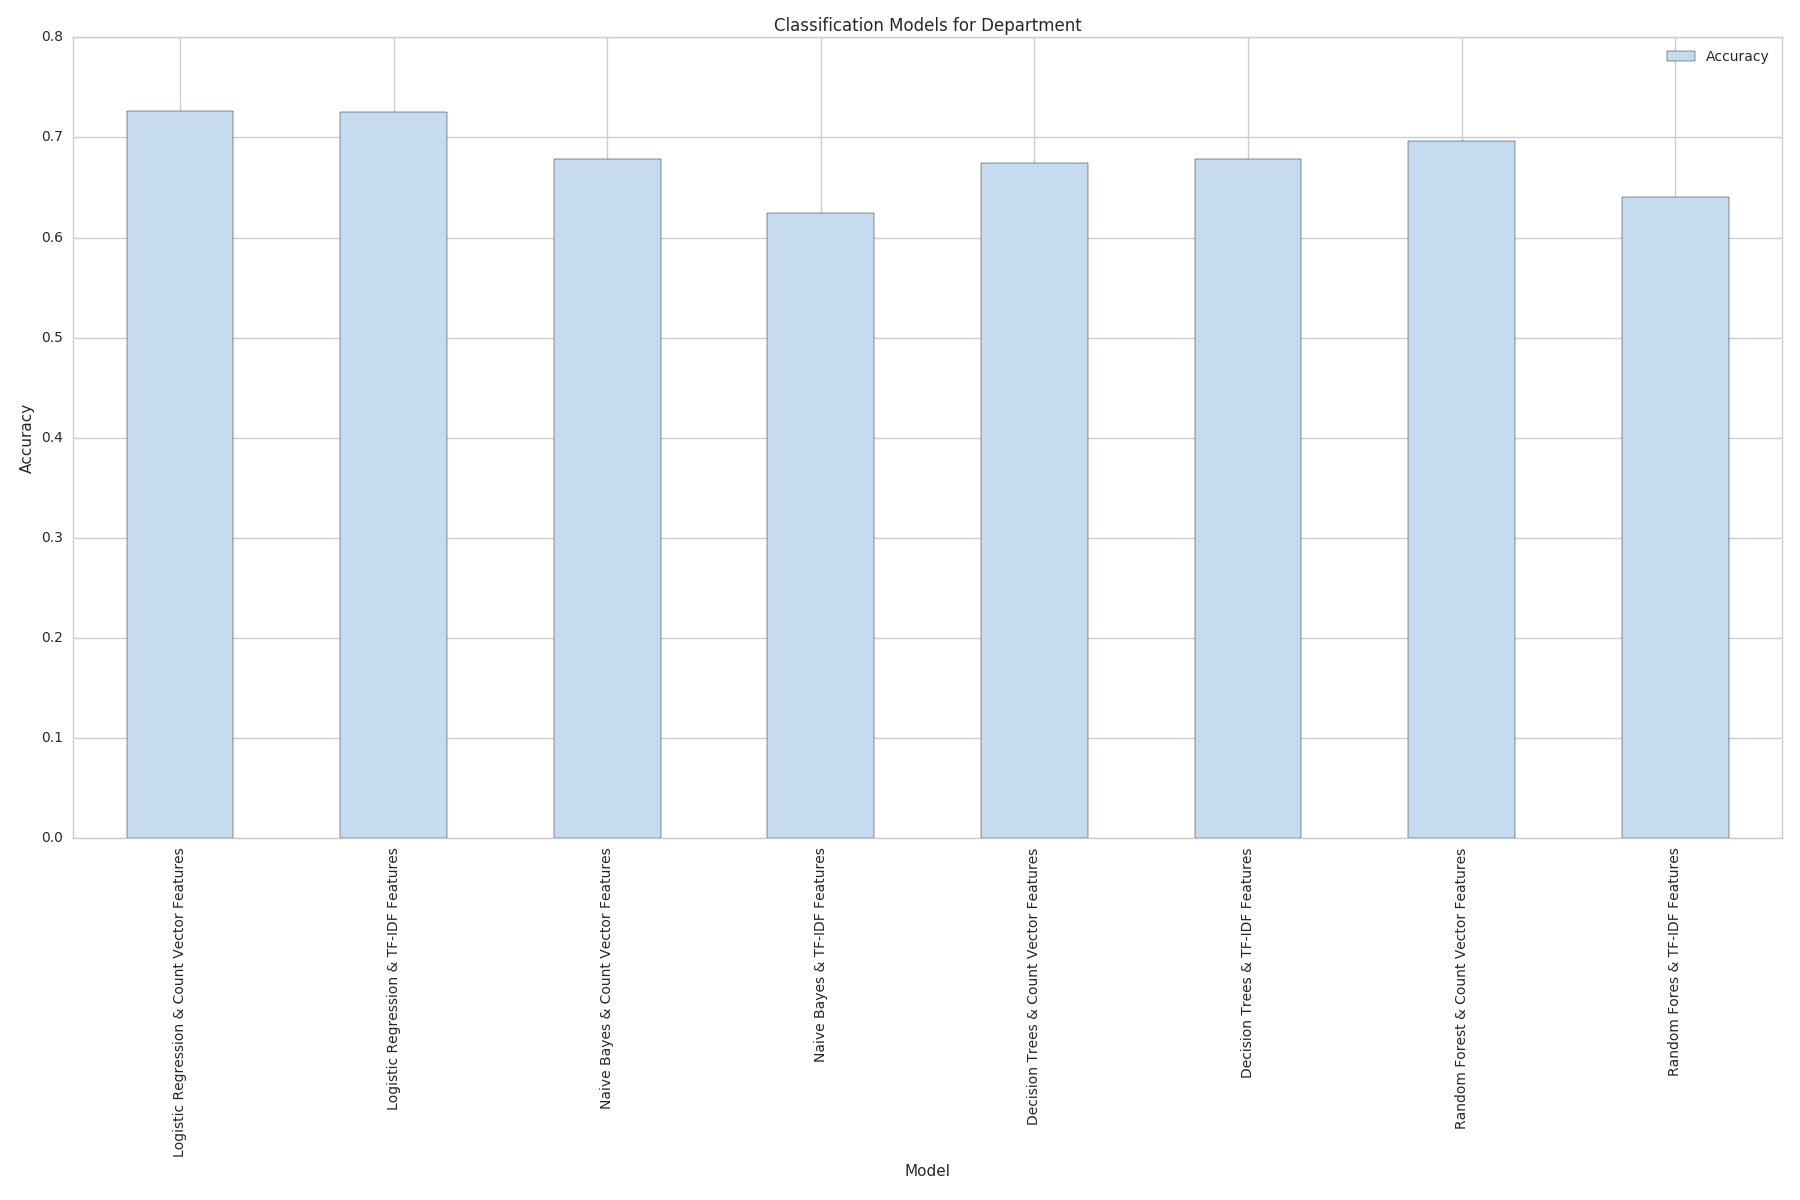

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = [18,12]


# Creación pandas dataframe models y ordenamiento
objects = ['Logistic Regression & Count Vector Features', 'Logistic Regression & TF-IDF Features', \
           'Naive Bayes & Count Vector Features', 'Naive Bayes & TF-IDF Features', \
           'Decision Trees & Count Vector Features', 'Decision Trees & TF-IDF Features', \
           'Random Forest & Count Vector Features','Random Fores & TF-IDF Features']

acuracy_models_df = pd.DataFrame({'models':objects,'Accuracy':accuracy_models_department})

# Gráfico de barras
x = np.arange(len(objects))
 
acuracy_models_df.plot.bar(color=sns.color_palette("Blues",3), align='center')
plt.xticks(x, objects, rotation='vertical')
#plt.axis('tight')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Classification Models for Department')
plt.tight_layout()

display()
plt.gcf().clear()

#####4.5. Obtención del mejor modelo.

In [42]:
# Index max accuracy
index = np.argmax(accuracy_models_department)

# Obtención mejor modelo
modelo1 = best_models_department[index]

# Visualización
print ("Best Model:" + str(objects[index]))

Best Model:Logistic Regression & Count Vector Features

####5.0. Modelo 2: Predicción de "topic" en base a "review_text":
- Predición de topic para department "Room"
- Predición de topic para department "Gastronomy"

#####5.1. Creación de los dataframes con reviews para los departments "Gastronomy" y "Room":

In [45]:
# Creación de un dataframe para el department Gastronomy
reviews_gastronomy_df = reviews_df_cleaned.filter(reviews_df.department == 'Gastronomy')

# Creación de un dataframe para el department Room
reviews_room_df = reviews_df_cleaned.filter(reviews_df.department == 'Room')

# Creación de un dataframe para la agrupación de topic en gastronomy
reviews_gastronomy_df_grouped = reviews_gastronomy_df.groupBy('topic').count().sort(asc('topic'))
reviews_gastronomy_df_grouped.show(3)

# Creación de un dataframe para la agrupación de topic en gastronomy
reviews_room_df_grouped = reviews_room_df.groupBy('topic').count().sort(asc('topic'))
reviews_room_df_grouped.show(3)

# Union dataframes
print("reviews_gastronomy_df Count: " + str(reviews_gastronomy_df.count()))
print("reviews_room_df Count: " + str(reviews_room_df.count()))

+-----------+-----+
 topic|count|
+-----------+-----+
 buffet| 1933|
 dinner| 248|
temperature| 109|
+-----------+-----+

+-----+-----+
topic|count|
+-----+-----+
 bed| 429|
 room| 1516|
 size| 179|
+-----+-----+

reviews_gastronomy_df Count: 2290
reviews_room_df Count: 2124

#####5.2. Procesamiento del Texto.
Se realizan las operaciones de normalización de las reviews. Eliminación de puntuación, saltos de línea, números y caracteres especiales.

In [47]:
# Label indexed for topic
label_stringIdx_topic = StringIndexer(inputCol = "topic", outputCol = "label").setHandleInvalid("keep")
# Pipeline for Count Vector
pipelineCV_topic = Pipeline(stages=[regexTokenizer, stopwordsRemover, countVectors, label_stringIdx_topic])
# Pipeline for IDF
pipelineIDF_topic = Pipeline(stages=[regexTokenizer, stopwordsRemover, hashingTF, idf, label_stringIdx_topic])


# Dataset department Room for Count Vector
pipelineFitCV_room = pipelineCV_topic.fit(reviews_room_df)
dataset_countVector_room = pipelineFitCV_room.transform(reviews_room_df)
dataset_countVector_room.show(4)

# Dataset department Gastronomy for Count Vector
pipelineFitCV_gastronomy = pipelineCV_topic.fit(reviews_gastronomy_df)
dataset_countVector_gastronomy = pipelineFitCV_gastronomy.transform(reviews_gastronomy_df)
dataset_countVector_gastronomy.show(4)



# Dataset department Room for IDF
pipelineFitIDF_room = pipelineIDF_topic.fit(reviews_room_df)
dataset_IDF_room = pipelineFitIDF_room.transform(reviews_room_df)
dataset_IDF_room.show(4)

# Dataset department Gastronomy for IDF
pipelineFitIDF_gastronomy = pipelineIDF_topic.fit(reviews_gastronomy_df)
dataset_IDF_gastronomy = pipelineFitIDF_gastronomy.transform(reviews_gastronomy_df)
dataset_IDF_gastronomy.show(4)

+--------------------+----------+-----+------+--------------------+--------------------+--------------------+-----+
 review_text|department|topic|rating| words| filtered| features|label|
+--------------------+----------+-----+------+--------------------+--------------------+--------------------+-----+
visited with fami...| Room| bed| 50.0|[visited, with, f...|[visited, family,...|(1733,[5,17,18,35...| 1.0|
visited with fami...| Room| bed| 50.0|[visited, with, f...|[visited, family,...|(1733,[5,17,18,35...| 1.0|
the hotel was ver...| Room| bed| 50.0|[the, hotel, was,...|[nice, beds, comf...|(1733,[1,2,3,4,6,...| 1.0|
room had very mod...| Room| bed| 30.0|[room, had, very,...|[room, modern, de...|(1733,[0,1,6,9,15...| 1.0|
+--------------------+----------+-----+------+--------------------+--------------------+--------------------+-----+
only showing top 4 rows

+--------------------+----------+------+------+--------------------+--------------------+--------------------+-----+
 review_text|department| topic|rating| words| filtered| features|label|
+--------------------+----------+------+------+--------------------+--------------------+--------------------+-----+
this is a quiet ...|Gastronomy|buffet| 40.0|[this, is, a, qui...|[quiet, layed, ba...|(1744,[1,5,7,15,1...| 0.0|
we were halfboard...|Gastronomy|buffet| 50.0|[we, were, halfbo...|[halfboard, room,...|(1744,[1,2,7,11,1...| 0.0|
our third visit t...|Gastronomy|buffet| 40.0|[our, third, visi...|[third, visit, la...|(1744,[2,3,4,7,10...| 0.0|
first time visit ...|Gastronomy|buffet| 50.0|[first, time, vis...|[first, time, vis...|(1744,[0,1,3,6,7,...| 0.0|
+--------------------+----------+------+------+--------------------+--------------------+--------------------+-----+
only showing top 4 rows

+--------------------+----------+-----+------+--------------------+--------------------+--------------------+--------------------+-----+
 review_text|department|topic|rating| words| filtered| rawFeatures| features|label|
+--------------------+----------+-----+------+--------------------+--------------------+--------------------+--------------------+-----+
visited with fami...| Room| bed| 50.0|[visited, with, f...|[visited, family,...|(10000,[126,1030,...|(10000,[126,1030,...| 1.0|
visited with fami...| Room| bed| 50.0|[visited, with, f...|[visited, family,...|(10000,[126,1030,...|(10000,[126,1030,...| 1.0|
the hotel was ver...| Room| bed| 50.0|[the, hotel, was,...|[nice, beds, comf...|(10000,[1,494,941...|(10000,[1,494,941...| 1.0|
room had very mod...| Room| bed| 30.0|[room, had, very,...|[room, modern, de...|(10000,[8,494,524...|(10000,[8,494,524...| 1.0|
+--------------------+----------+-----+------+--------------------+--------------------+--------------------+--------------------+-----+
only showing top 4 rows

+--------------------+----------+------+------+--------------------+--------------------+--------------------+--------------------+-----+
 review_text|department| topic|rating| words| filtered| rawFeatures| features|label|
+--------------------+----------+------+------+--------------------+--------------------+--------------------+--------------------+-----+
this is a quiet ...|Gastronomy|buffet| 40.0|[this, is, a, qui...|[quiet, layed, ba...|(10000,[8,128,277...|(10000,[8,128,277...| 0.0|
we were halfboard...|Gastronomy|buffet| 50.0|[we, were, halfbo...|[halfboard, room,...|(10000,[1,494,505...|(10000,[1,494,505...| 0.0|
our third visit t...|Gastronomy|buffet| 40.0|[our, third, visi...|[third, visit, la...|(10000,[1,26,165,...|(10000,[1,26,165,...| 0.0|
first time visit ...|Gastronomy|buffet| 50.0|[first, time, vis...|[first, time, vis...|(10000,[26,87,161...|(10000,[26,87,161...| 0.0|
+--------------------+----------+------+------+--------------------+--------------------+--------------------+--------------------+-----+
only showing top 4 rows

#####5.3. Creación del dataframe code_label_room_df  y code_label_gastronomy_df (label asignada a cada topic):
Creación de un dataframe con la label asignada a cada topic trás haber aplicado la función **StringIndexer** en el preprocesado del texto anterior.

In [49]:
# Creación dataframe code_label_roomo_df
code_label_room_df = dataset_countVector_room.select('topic', 'label'). distinct().sort(asc('label'))
code_label_room_df.show(3, truncate=50)

# Creación dataframe code_label_roomo_df
code_label_gastronomy_df = dataset_countVector_gastronomy.select('topic', 'label'). distinct().sort(asc('label'))
code_label_gastronomy_df.show(3, truncate=50)

+-----+-----+
topic|label|
+-----+-----+
 room| 0.0|
 bed| 1.0|
 size| 2.0|
+-----+-----+

+-----------+-----+
 topic|label|
+-----------+-----+
 buffet| 0.0|
 dinner| 1.0|
temperature| 2.0|
+-----------+-----+

#####5.3. Empleo de diferentes modelos:
Para los modelos empleados se ha utilizado la validación cruzada. Los modelos solo musetras los valores óptimos obtenidos como hiperparámetros a modo de agilizar la ejecución de los modelos en posteriores ejecuciones.

Los modelos se ejecutaran sonbre los distintos dataframes creados tanto para los topics de department "Room" como para los topics de departments "Gastronomy".

#####5.3.1. Creación de conjuntos de entrenamiento y test para los modelos:

In [52]:
# Count vector Room
(trainingDataCV_room, testDataCV_room) = dataset_countVector_room.randomSplit([0.8, 0.2], seed = 1234)
print("trainingDataCV_room Count: " + str(trainingDataCV_room.count()))
print("testDataCV_room Count: " + str(testDataCV_room.count()))

# Count vector Gastronomy
(trainingDataCV_gastronomy, testDataCV_gastronomy) = dataset_countVector_gastronomy.randomSplit([0.8, 0.2], seed = 1234)
print("trainingDataCV_gastronomy Count: " + str(trainingDataCV_gastronomy.count()))
print("testDataCV_gastronomy Count: " + str(testDataCV_gastronomy.count()))

# HashingTF and IDF Room
(trainingDataIDF_room, testDataIDF_room) = dataset_IDF_room.randomSplit([0.8, 0.2], seed = 1234)
print("trainingDataIDF_room Count: " + str(trainingDataIDF_room.count()))
print("testDataIDF_room Count: " + str(testDataIDF_room.count()))

# HashingTF and IDF Gastronomy
(trainingDataIDF_gastronomy, testDataIDF_gastronomy) = dataset_IDF_gastronomy.randomSplit([0.8, 0.2], seed = 1234)
print("trainingDataIDF_gastronomy Count: " + str(trainingDataIDF_gastronomy.count()))
print("testDataIDF_gastronomy Count: " + str(testDataIDF_gastronomy.count()))

# Creación de lista para métricas
accuracy_models_room =[]
accuracy_models_gastronomy =[]

# Creación de lista para mejores modelos
best_models_room = []
best_models_gastronomy = []

trainingDataCV_room Count: 1721
testDataCV_room Count: 403
trainingDataCV_gastronomy Count: 1851
testDataCV_gastronomy Count: 439
trainingDataIDF_room Count: 1721
testDataIDF_room Count: 403
trainingDataIDF_gastronomy Count: 1851
testDataIDF_gastronomy Count: 439

#####5.3.2. Empleo de un modelo tipo: Logistic Regression - Count Vector Features con validación cruzada.

In [54]:
# Build the models
lrCV_topic = LogisticRegression(labelCol='label')
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", metricName="accuracy")

# ParamGrid for Cross Validation
lr_paramGrid_cv_topic = (ParamGridBuilder()
             .addGrid(lrCV_topic.regParam, [0.1])                   
             .addGrid(lrCV_topic.elasticNetParam, [0.3])            
             .addGrid(lrCV_topic.maxIter, [50])                     
             .build())

# Create 5-fold CrossValidator
LRCV_topic = CrossValidator(estimator=lrCV_topic, \
                    estimatorParamMaps=lr_paramGrid_cv_topic, \
                    evaluator=evaluator, \
                    numFolds=3)

# Run cross validations for Room
LRModelCV_room = LRCV_topic.fit(trainingDataCV_room)

# Run cross validations for Gastronomy
LRModelCV_gastronomy = LRCV_topic.fit(trainingDataCV_gastronomy)

# Ejecución sobre conjunto de test Room
predictionsLRCV_room = LRModelCV_room.transform(testDataCV_room)

# Ejecución sobre conjunto de test Gastronomy
predictionsLRCV_gastronomy = LRModelCV_gastronomy.transform(testDataCV_gastronomy)

# Obtenición predicciones Room
predictionsLRCV_room.select("review_text","department","probability", "label","prediction") \
               .orderBy("probability", ascending=False) \
               .show(n = 4, truncate = 30)

# Obtenición predicciones Gastronomy
predictionsLRCV_gastronomy.select("review_text","department","probability", "label","prediction") \
               .orderBy("probability", ascending=False) \
               .show(n = 4, truncate = 30)

# Evaluaación del modelo
accuracy_room = evaluator.evaluate(predictionsLRCV_room)
accuracy_gastronomy = evaluator.evaluate(predictionsLRCV_gastronomy)
accuracy_models_room.append(accuracy_room)
accuracy_models_gastronomy.append(accuracy_gastronomy)
best_models_room.append(LRModelCV_room)
best_models_gastronomy.append(LRModelCV_gastronomy)

# print accuracy
print ("Accuracy Score for Room: {0:.4f}".format(accuracy_room))
print ("Accuracy Score for Gastronomy: {0:.4f}".format(accuracy_gastronomy))

+------------------------------+----------+------------------------------+-----+----------+
 review_text|department| probability|label|prediction|
+------------------------------+----------+------------------------------+-----+----------+
brilliant hotel staff food ...| Room|[0.862614676360028,0.080002...| 0.0| 0.0|
great rooms clean and spa...| Room|[0.8618135210113332,0.07967...| 0.0| 0.0|
praise must go to the manag...| Room|[0.8577864527446325,0.08117...| 0.0| 0.0|
just back from a weeks stay...| Room|[0.8577142438875945,0.08122...| 0.0| 0.0|
+------------------------------+----------+------------------------------+-----+----------+
only showing top 4 rows

+------------------------------+----------+------------------------------+-----+----------+
 review_text|department| probability|label|prediction|
+------------------------------+----------+------------------------------+-----+----------+
brilliant hotel rooms very ...|Gastronomy|[0.8877151862239157,0.08307...| 0.0| 0.0|
lovely hotel if you are loo...|Gastronomy|[0.8877151862239157,0.08307...| 0.0| 0.0|
very cozy and clean room c...|Gastronomy|[0.8877151862239157,0.08307...| 0.0| 0.0|
does not cater for pure veg...|Gastronomy|[0.8877151862239157,0.08307...| 1.0| 0.0|
+------------------------------+----------+------------------------------+-----+----------+
only showing top 4 rows

Accuracy Score for Room: 0.7295
Accuracy Score for Gastronomy: 0.8087

#####5.3.3. Empleo de un modelo tipo: Logistic Regression - TF-IDF Features con validación cruzada.

In [56]:
# Build the model
lrIDF_topic = LogisticRegression(labelCol='label')

# Create ParamGrid for Cross Validation
lr_paramGrid_idf_topic = (ParamGridBuilder()
             .addGrid(lrIDF_topic.regParam, [0.1])
             .addGrid(lrIDF_topic.elasticNetParam, [0.3]) 
             .addGrid(lrIDF_topic.maxIter, [50]) 
             .build())

# Create 5-fold CrossValidator
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", metricName="accuracy")
LRIDF_topic = CrossValidator(estimator=lrIDF_topic, \
                    estimatorParamMaps=lr_paramGrid_idf_topic, \
                    evaluator=evaluator, \
                    numFolds=3)

# Run cross validations for Room
LRModelIDF_room = LRIDF_topic.fit(trainingDataIDF_room)

# Run cross validations for Gastronomy
LRModelIDF_gastronomy = LRIDF_topic.fit(trainingDataIDF_gastronomy)

# Ejecución sobre conjunto de test Room
predictionsLRIDF_room = LRModelIDF_room.transform(testDataIDF_room)

# Ejecución sobre conjunto de test Gastronomy
predictionsLRIDF_gastronomy = LRModelIDF_gastronomy.transform(testDataIDF_gastronomy)

# Obtenición predicciones for Room
predictionsLRIDF_room.select("review_text","department","probability", "label","prediction") \
               .orderBy("probability", ascending=False) \
               .show(n = 4, truncate = 30)

# Obtenición predicciones for Gastronomy
predictionsLRIDF_gastronomy.select("review_text","department","probability", "label","prediction") \
               .orderBy("probability", ascending=False) \
               .show(n = 4, truncate = 30)

# Evaluaación del modelo
accuracy_room = evaluator.evaluate(predictionsLRIDF_room)
accuracy_gastronomy = evaluator.evaluate(predictionsLRIDF_gastronomy)
accuracy_models_room.append(accuracy_room)
accuracy_models_gastronomy.append(accuracy_gastronomy)
best_models_room.append(LRModelIDF_room)
best_models_gastronomy.append(LRModelIDF_gastronomy)

# print accuracy
print ("Accuracy Score for Room: {0:.4f}".format(accuracy_room))
print ("Accuracy Score for Gastronomy: {0:.4f}".format(accuracy_gastronomy))

+------------------------------+----------+------------------------------+-----+----------+
 review_text|department| probability|label|prediction|
+------------------------------+----------+------------------------------+-----+----------+
brilliant hotel staff food ...| Room|[0.8618556457624703,0.08010...| 0.0| 0.0|
great rooms clean and spa...| Room|[0.8582447289213186,0.08142...| 0.0| 0.0|
praise must go to the manag...| Room|[0.8543019250616741,0.08287...| 0.0| 0.0|
just back from a weeks stay...| Room|[0.8539334779106719,0.08308...| 0.0| 0.0|
+------------------------------+----------+------------------------------+-----+----------+
only showing top 4 rows

+------------------------------+----------+------------------------------+-----+----------+
 review_text|department| probability|label|prediction|
+------------------------------+----------+------------------------------+-----+----------+
brilliant hotel rooms very ...|Gastronomy|[0.887530983230562,0.083129...| 0.0| 0.0|
very cozy and clean room c...|Gastronomy|[0.887530983230562,0.083129...| 0.0| 0.0|
lovely hotel if you are loo...|Gastronomy|[0.887530983230562,0.083129...| 0.0| 0.0|
does not cater for pure veg...|Gastronomy|[0.887530983230562,0.083129...| 1.0| 0.0|
+------------------------------+----------+------------------------------+-----+----------+
only showing top 4 rows

Accuracy Score for Room: 0.7270
Accuracy Score for Gastronomy: 0.8087

#####5.3.4. Empleo de un modelo tipo: Naive Bayes - Count Vectores Features con validación cruzada.

In [58]:
# Model
nbCV_topic = NaiveBayes(modelType="multinomial")

# Create ParamGrid for Cross Validation
nb_paramGrid_cv_topic = ParamGridBuilder().addGrid(nbCV_topic.smoothing, [5.0]).build()

# Create 5-fold CrossValidator
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", metricName="accuracy")
NVCV_topic = CrossValidator(estimator=nbCV_topic, \
                    estimatorParamMaps=nb_paramGrid_cv_topic, \
                    evaluator=evaluator, \
                    numFolds=3)


# Run cross validations for Room
NVModelCV_room = NVCV_topic.fit(trainingDataCV_room)

# Run cross validations for Gastronomy
NVModelCV_gastronomy = NVCV_topic.fit(trainingDataCV_gastronomy)

# Ejecución sobre conjunto de test Room
predictionsNVCV_room = NVModelCV_room.transform(testDataCV_room)

# Ejecución sobre conjunto de test Gastronomy
predictionsNVCV_gastronomy = NVModelCV_gastronomy.transform(testDataCV_gastronomy)

# Obtenición predicciones for Room
predictionsNVCV_room.select("review_text","department","probability", "label","prediction") \
               .orderBy("probability", ascending=False) \
               .show(n = 4, truncate = 30)

# Obtenición predicciones for Gastronomy
predictionsNVCV_gastronomy.select("review_text","department","probability", "label","prediction") \
               .orderBy("probability", ascending=False) \
               .show(n = 4, truncate = 30)



# Evaluaación del modelo
accuracy_room = evaluator.evaluate(predictionsNVCV_room)
accuracy_gastronomy = evaluator.evaluate(predictionsNVCV_gastronomy)
accuracy_models_room.append(accuracy_room)
accuracy_models_gastronomy.append(accuracy_gastronomy)
best_models_room.append(NVModelCV_room)
best_models_gastronomy.append(NVModelCV_gastronomy)

# print accuracy
print ("Accuracy Score for Room: {0:.4f}".format(accuracy_room))
print ("Accuracy Score for Gastronomy: {0:.4f}".format(accuracy_gastronomy))

+------------------------------+----------+------------------------------+-----+----------+
 review_text|department| probability|label|prediction|
+------------------------------+----------+------------------------------+-----+----------+
this hotel was perfectly ni...| Room|[0.9999999987087873,1.29120...| 0.0| 0.0|
we knew when we booked that...| Room|[0.9999998572577156,1.42681...| 1.0| 0.0|
lovely hotel food was very...| Room|[0.9999998210461312,1.78934...| 0.0| 0.0|
my boyfriend and i just ret...| Room|[0.9999997886886085,2.11311...| 0.0| 0.0|
+------------------------------+----------+------------------------------+-----+----------+
only showing top 4 rows

+------------------------------+----------+------------------------------+-----+----------+
 review_text|department| probability|label|prediction|
+------------------------------+----------+------------------------------+-----+----------+
just returned from a wonder...|Gastronomy|[0.9999999999999252,7.49391...| 0.0| 0.0|
just returned from a week a...|Gastronomy|[0.9999999999950306,4.96933...| 0.0| 0.0|
just returned from a week a...|Gastronomy|[0.9999999999871338,1.28661...| 0.0| 0.0|
great family holiday in lov...|Gastronomy|[0.9999999999802602,1.97396...| 0.0| 0.0|
+------------------------------+----------+------------------------------+-----+----------+
only showing top 4 rows

Accuracy Score for Room: 0.7345
Accuracy Score for Gastronomy: 0.8109

#####5.3.5. Empleo de un modelo tipo: Naive Bayes - TF-IDF Features con validación cruzada.

In [60]:
# Model
nbIDF_topic = NaiveBayes(modelType="multinomial")

# Create ParamGrid for Cross Validation
nb_paramGrid_idf_topic = ParamGridBuilder().addGrid(nbIDF_topic.smoothing, [5.0]).build()

# Create 5-fold CrossValidator
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", metricName="accuracy")
NVIDF_topic = CrossValidator(estimator=nbIDF_topic, \
                    estimatorParamMaps=nb_paramGrid_idf_topic, \
                    evaluator=evaluator, \
                    numFolds=3)

# Run cross validations for Room
NVModelIDF_room = NVIDF_topic.fit(trainingDataIDF_room)

# Run cross validations for Gastronomy
NVModelIDF_gastronomy = NVIDF_topic.fit(trainingDataIDF_gastronomy)

# Ejecución sobre conjunto de test Room
predictionsNVIDF_room = NVModelIDF_room.transform(testDataIDF_room)

# Ejecución sobre conjunto de test Gastronomy
predictionsNVIDF_gastronomy = NVModelIDF_gastronomy.transform(testDataIDF_gastronomy)

# Obtenición predicciones for Room
predictionsNVIDF_room.select("review_text","department","probability", "label","prediction") \
               .orderBy("probability", ascending=False) \
               .show(n = 4, truncate = 30)

# Obtenición predicciones for Gastronomy
predictionsNVIDF_gastronomy.select("review_text","department","probability", "label","prediction") \
               .orderBy("probability", ascending=False) \
               .show(n = 4, truncate = 30)

# Evaluaación del modelo
accuracy_room = evaluator.evaluate(predictionsNVIDF_room)
accuracy_gastronomy = evaluator.evaluate(predictionsNVIDF_gastronomy)
accuracy_models_room.append(accuracy_room)
accuracy_models_gastronomy.append(accuracy_gastronomy)
best_models_room.append(NVModelIDF_room)
best_models_gastronomy.append(NVModelIDF_gastronomy)

# print accuracy
print ("Accuracy Score for Room: {0:.4f}".format(accuracy_room))
print ("Accuracy Score for Gastronomy: {0:.4f}".format(accuracy_gastronomy))

+------------------------------+----------+------------------------------+-----+----------+
 review_text|department| probability|label|prediction|
+------------------------------+----------+------------------------------+-----+----------+
fantastic hotel rooms amazi...| Room|[1.0,1.10041562705077E-16,1...| 0.0| 0.0|
we could not find fault wit...| Room|[1.0,1.038850457347708E-16,...| 1.0| 0.0|
adult only the way to go ...| Room|[1.0,7.688842937820111E-17,...| 0.0| 0.0|
can t really fault this hot...| Room|[1.0,6.6695752949809E-17,1....| 0.0| 0.0|
+------------------------------+----------+------------------------------+-----+----------+
only showing top 4 rows

+------------------------------+----------+------------------------------+-----+----------+
 review_text|department| probability|label|prediction|
+------------------------------+----------+------------------------------+-----+----------+
nice four star hotel at los...|Gastronomy|[1.0,1.0873600262988119E-16...| 0.0| 0.0|
the beach is fantastic the...|Gastronomy|[1.0,1.0800623741456774E-16...| 0.0| 0.0|
adult only hotel very good ...|Gastronomy|[1.0,8.449491966448612E-17,...| 0.0| 0.0|
we stayed here in june ...|Gastronomy|[1.0,5.877435474138001E-17,...| 0.0| 0.0|
+------------------------------+----------+------------------------------+-----+----------+
only showing top 4 rows

Accuracy Score for Room: 0.7146
Accuracy Score for Gastronomy: 0.8087

#####5.3.6. Empleo de un modelo tipo: Decision Tress - Count Vectores Features con validación cruzada.

In [62]:
# Model
dtCV_topic = DecisionTreeClassifier(labelCol="label", featuresCol="features")

# Grid de parámetros
dt_grid_cv_topic = ParamGridBuilder() \
.addGrid(dtCV_topic.maxDepth, [10]) \
.addGrid(dtCV_topic.maxBins, [50]) \
.build()

# Create 5-fold CrossValidator
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", metricName="accuracy")
DTCV_topic = CrossValidator(estimator=dtCV_topic, \
                    estimatorParamMaps=dt_grid_cv_topic, \
                    evaluator=evaluator, \
                    numFolds=3)

# Run cross validations for Room
DTModelCV_room = DTCV_topic.fit(trainingDataCV_room)

# Run cross validations for Gastronomy
DTModelCV_gastronomy = DTCV_topic.fit(trainingDataCV_gastronomy)

# Ejecución sobre conjunto de test Room
predictionsDTCV_room = DTModelCV_room.transform(testDataCV_room)

# Ejecución sobre conjunto de test Gastronomy
predictionsDTCV_gastronomy = DTModelCV_gastronomy.transform(testDataCV_gastronomy)

# Obtenición predicciones for Room
predictionsDTCV_room.select("review_text","department","probability", "label","prediction") \
               .orderBy("probability", ascending=False) \
               .show(n = 4, truncate = 30)

# Obtenición predicciones for Gastronomy
predictionsDTCV_gastronomy.select("review_text","department","probability", "label","prediction") \
               .orderBy("probability", ascending=False) \
               .show(n = 4, truncate = 30)

# Evaluaación del modelo
accuracy_room = evaluator.evaluate(predictionsDTCV_room)
accuracy_gastronomy = evaluator.evaluate(predictionsDTCV_gastronomy)
accuracy_models_room.append(accuracy_room)
accuracy_models_gastronomy.append(accuracy_gastronomy)
best_models_room.append(DTModelCV_room)
best_models_gastronomy.append(DTModelCV_gastronomy)

# print accuracy
print ("Accuracy Score for Room: {0:.4f}".format(accuracy_room))
print ("Accuracy Score for Gastronomy: {0:.4f}".format(accuracy_gastronomy))

+------------------------------+----------+-----------------+-----+----------+
 review_text|department| probability|label|prediction|
+------------------------------+----------+-----------------+-----+----------+
we stayed here as part of a...| Room|[1.0,0.0,0.0,0.0]| 0.0| 0.0|
very friendly hotel excelle...| Room|[1.0,0.0,0.0,0.0]| 1.0| 0.0|
my boyfriend and i thorough...| Room|[1.0,0.0,0.0,0.0]| 0.0| 0.0|
location of the hotel was e...| Room|[1.0,0.0,0.0,0.0]| 2.0| 0.0|
+------------------------------+----------+-----------------+-----+----------+
only showing top 4 rows

+------------------------------+----------+-----------------+-----+----------+
 review_text|department| probability|label|prediction|
+------------------------------+----------+-----------------+-----+----------+
food presentation was excel...|Gastronomy|[1.0,0.0,0.0,0.0]| 2.0| 0.0|
very clean internally bedr...|Gastronomy|[1.0,0.0,0.0,0.0]| 1.0| 0.0|
we arrived just before the ...|Gastronomy|[1.0,0.0,0.0,0.0]| 0.0| 0.0|
we stayed here for a week i...|Gastronomy|[1.0,0.0,0.0,0.0]| 0.0| 0.0|
+------------------------------+----------+-----------------+-----+----------+
only showing top 4 rows

Accuracy Score for Room: 0.7246
Accuracy Score for Gastronomy: 0.7654

#####5.3.7. Empleo de un modelo tipo: Decision Tress - TF-IDF Features con validación cruzada.

In [64]:
# Model
dtIDF_topic = DecisionTreeClassifier(labelCol="label", featuresCol="features")

# Grid de parámetros
dt_grid_idf_topic = ParamGridBuilder() \
.addGrid(dtIDF_topic.maxDepth, [6]) \
.addGrid(dtIDF_topic.maxBins, [20]) \
.build()

# Create 5-fold CrossValidator
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", metricName="accuracy")
DTIDF_topic = CrossValidator(estimator=dtIDF_topic, \
                    estimatorParamMaps=dt_grid_idf_topic, \
                    evaluator=evaluator, \
                    numFolds=3)

# Run cross validations for Room
DTModelIDF_room = DTIDF_topic.fit(trainingDataIDF_room)

# Run cross validations for Gastronomy
DTModelIDF_gastronomy = DTIDF_topic.fit(trainingDataIDF_gastronomy)

# Ejecución sobre conjunto de test Room
predictionsDTIDF_room = DTModelIDF_room.transform(testDataIDF_room)

# Ejecución sobre conjunto de test Gastronomy
predictionsDTIDF_gastronomy = DTModelIDF_gastronomy.transform(testDataIDF_gastronomy)

# Obtenición predicciones for Room
predictionsDTIDF_room.select("review_text","department","probability", "label","prediction") \
               .orderBy("probability", ascending=False) \
               .show(n = 4, truncate = 30)

# Obtenición predicciones for Gastronomy
predictionsDTIDF_gastronomy.select("review_text","department","probability", "label","prediction") \
               .orderBy("probability", ascending=False) \
               .show(n = 4, truncate = 30)

# Evaluaación del modelo
accuracy_room = evaluator.evaluate(predictionsDTIDF_room)
accuracy_gastronomy = evaluator.evaluate(predictionsDTIDF_gastronomy)
accuracy_models_room.append(accuracy_room)
accuracy_models_gastronomy.append(accuracy_gastronomy)
best_models_room.append(DTModelIDF_room)
best_models_gastronomy.append(DTModelIDF_gastronomy)

# print accuracy
print ("Accuracy Score for Room: {0:.4f}".format(accuracy_room))
print ("Accuracy Score for Gastronomy: {0:.4f}".format(accuracy_gastronomy))

+------------------------------+----------+-----------------+-----+----------+
 review_text|department| probability|label|prediction|
+------------------------------+----------+-----------------+-----+----------+
we stayed here as part of a...| Room|[1.0,0.0,0.0,0.0]| 0.0| 0.0|
my boyfriend and i thorough...| Room|[1.0,0.0,0.0,0.0]| 0.0| 0.0|
very friendly hotel excelle...| Room|[1.0,0.0,0.0,0.0]| 1.0| 0.0|
location of the hotel was e...| Room|[1.0,0.0,0.0,0.0]| 2.0| 0.0|
+------------------------------+----------+-----------------+-----+----------+
only showing top 4 rows

+------------------------------+----------+-----------------+-----+----------+
 review_text|department| probability|label|prediction|
+------------------------------+----------+-----------------+-----+----------+
was a lovely get away for m...|Gastronomy|[1.0,0.0,0.0,0.0]| 0.0| 0.0|
we arrived just before the ...|Gastronomy|[1.0,0.0,0.0,0.0]| 0.0| 0.0|
food presentation was excel...|Gastronomy|[1.0,0.0,0.0,0.0]| 2.0| 0.0|
we stayed here for a week i...|Gastronomy|[1.0,0.0,0.0,0.0]| 0.0| 0.0|
+------------------------------+----------+-----------------+-----+----------+
only showing top 4 rows

Accuracy Score for Room: 0.7419
Accuracy Score for Gastronomy: 0.7950

#####5.3.8. Empleo de un modelo tipo: Random Forest - Count Vectores Features con validación cruzada.

In [66]:
# Model
rfCV_topic = RandomForestClassifier(labelCol="label", featuresCol="features")

# Grid de parámetros
rf_grid_cv_topic = ParamGridBuilder() \
.addGrid(rfCV_topic.numTrees, [20]) \
.addGrid(rfCV_topic.maxDepth, [6]) \
.addGrid(rfCV_topic.maxBins, [30]) \
.build()

# Create 5-fold CrossValidator
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", metricName="accuracy")
RFCV_topic = CrossValidator(estimator=rfCV_topic, \
                    estimatorParamMaps=rf_grid_cv_topic, \
                    evaluator=evaluator, \
                    numFolds=3)

# Run cross validations for Room
RFModelCV_room = RFCV_topic.fit(trainingDataCV_room)

# Run cross validations for Gastronomy
RFModelCV_gastronomy = RFCV_topic.fit(trainingDataCV_gastronomy)

# Ejecución sobre conjunto de test Room
predictionsRFCV_room = RFModelCV_room.transform(testDataCV_room)

# Ejecución sobre conjunto de test Gastronomy
predictionsRFCV_gastronomy = RFModelCV_gastronomy.transform(testDataCV_gastronomy)

# Obtenición predicciones for Room
predictionsRFCV_room.select("review_text","department","probability", "label","prediction") \
               .orderBy("probability", ascending=False) \
               .show(n = 4, truncate = 30)

# Obtenición predicciones for Gastronomy
predictionsRFCV_gastronomy.select("review_text","department","probability", "label","prediction") \
               .orderBy("probability", ascending=False) \
               .show(n = 4, truncate = 30)

# Evaluaación del modelo
accuracy_room = evaluator.evaluate(predictionsRFCV_room)
accuracy_gastronomy = evaluator.evaluate(predictionsRFCV_gastronomy)
accuracy_models_room.append(accuracy_room)
accuracy_models_gastronomy.append(accuracy_gastronomy)
best_models_room.append(RFModelCV_room)
best_models_gastronomy.append(RFModelCV_gastronomy)

# print accuracy
print ("Accuracy Score for Room: {0:.4f}".format(accuracy_room))
print ("Accuracy Score for Gastronomy: {0:.4f}".format(accuracy_gastronomy))

+------------------------------+----------+------------------------------+-----+----------+
 review_text|department| probability|label|prediction|
+------------------------------+----------+------------------------------+-----+----------+
my boyfriend and i just ret...| Room|[0.8001508308923561,0.12711...| 0.0| 0.0|
just home from an amazing w...| Room|[0.7902282716208334,0.13234...| 0.0| 0.0|
beautiful spacious apartmen...| Room|[0.786886364207503,0.134812...| 0.0| 0.0|
we were so unbelievably imp...| Room|[0.7830105808131049,0.14214...| 0.0| 0.0|
+------------------------------+----------+------------------------------+-----+----------+
only showing top 4 rows

+------------------------------+----------+------------------------------+-----+----------+
 review_text|department| probability|label|prediction|
+------------------------------+----------+------------------------------+-----+----------+
excellent hotel our room w...|Gastronomy|[0.8877417233572451,0.08217...| 0.0| 0.0|
fantastic clean and friendl...|Gastronomy|[0.8867882513355732,0.08344...| 0.0| 0.0|
perfect in every way great...|Gastronomy|[0.8867882513355732,0.08344...| 0.0| 0.0|
had a great room in block ...|Gastronomy|[0.8867882513355732,0.08344...| 0.0| 0.0|
+------------------------------+----------+------------------------------+-----+----------+
only showing top 4 rows

Accuracy Score for Room: 0.7097
Accuracy Score for Gastronomy: 0.8064

#####5.3.9. Empleo de un modelo tipo: Random Forest - TF-IDF Features con validación cruzada.

In [68]:
# Model
rfIDF_topic = RandomForestClassifier(labelCol="label", featuresCol="features")

# Grid de parámetros
rf_grid_idf_topic = ParamGridBuilder() \
.addGrid(rfIDF_topic.numTrees, [20]) \
.addGrid(rfIDF_topic.maxDepth, [6]) \
.addGrid(rfIDF_topic.maxBins, [40]) \
.build()

# Create 5-fold CrossValidator
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", metricName="accuracy")
RFIDF_topic = CrossValidator(estimator=rfIDF_topic, \
                    estimatorParamMaps=rf_grid_idf_topic, \
                    evaluator=evaluator, \
                    numFolds=3)

# Run cross validations for Room
RFModelIDF_room = RFIDF_topic.fit(trainingDataIDF_room)

# Run cross validations for Gastronomy
RFModelIDF_gastronomy = RFIDF_topic.fit(trainingDataIDF_gastronomy)

# Ejecución sobre conjunto de test Room
predictionsRFIDF_room = RFModelIDF_room.transform(testDataIDF_room)

# Ejecución sobre conjunto de test Gastronomy
predictionsRFIDF_gastronomy = RFModelIDF_gastronomy.transform(testDataIDF_gastronomy)

# Obtenición predicciones for Room
predictionsRFIDF_room.select("review_text","department","probability", "label","prediction") \
               .orderBy("probability", ascending=False) \
               .show(n = 4, truncate = 30)

# Obtenición predicciones for Gastronomy
predictionsRFIDF_gastronomy.select("review_text","department","probability", "label","prediction") \
               .orderBy("probability", ascending=False) \
               .show(n = 4, truncate = 30)

# Evaluaación del modelo
accuracy_room = evaluator.evaluate(predictionsRFIDF_room)
accuracy_gastronomy = evaluator.evaluate(predictionsRFIDF_gastronomy)
accuracy_models_room.append(accuracy_room)
accuracy_models_gastronomy.append(accuracy_gastronomy)
best_models_room.append(RFModelIDF_room)
best_models_gastronomy.append(RFModelIDF_gastronomy)

# print accuracy
print ("Accuracy Score for Room: {0:.4f}".format(accuracy_room))
print ("Accuracy Score for Gastronomy: {0:.4f}".format(accuracy_gastronomy))

+------------------------------+----------+------------------------------+-----+----------+
 review_text|department| probability|label|prediction|
+------------------------------+----------+------------------------------+-----+----------+
praise must go to the manag...| Room|[0.7723864021973856,0.14931...| 0.0| 0.0|
service is exceptional and ...| Room|[0.7722429815094182,0.14814...| 0.0| 0.0|
first impression open plan ...| Room|[0.7691479318066672,0.14877...| 0.0| 0.0|
a really friendly hotel ver...| Room|[0.7690808542670461,0.14988...| 2.0| 0.0|
+------------------------------+----------+------------------------------+-----+----------+
only showing top 4 rows

+------------------------------+----------+------------------------------+-----+----------+
 review_text|department| probability|label|prediction|
+------------------------------+----------+------------------------------+-----+----------+
just returned from a wonder...|Gastronomy|[0.8886830687654784,0.08082...| 0.0| 0.0|
hy we would recommend our s...|Gastronomy|[0.8768853921417419,0.08856...| 0.0| 0.0|
just returned from a week a...|Gastronomy|[0.8763806201788068,0.09210...| 0.0| 0.0|
this is an amazing hotel fa...|Gastronomy|[0.8754391991484332,0.09138...| 0.0| 0.0|
+------------------------------+----------+------------------------------+-----+----------+
only showing top 4 rows

Accuracy Score for Room: 0.7122
Accuracy Score for Gastronomy: 0.8087

#####5.4. Comparación y evaluación de los modelos.

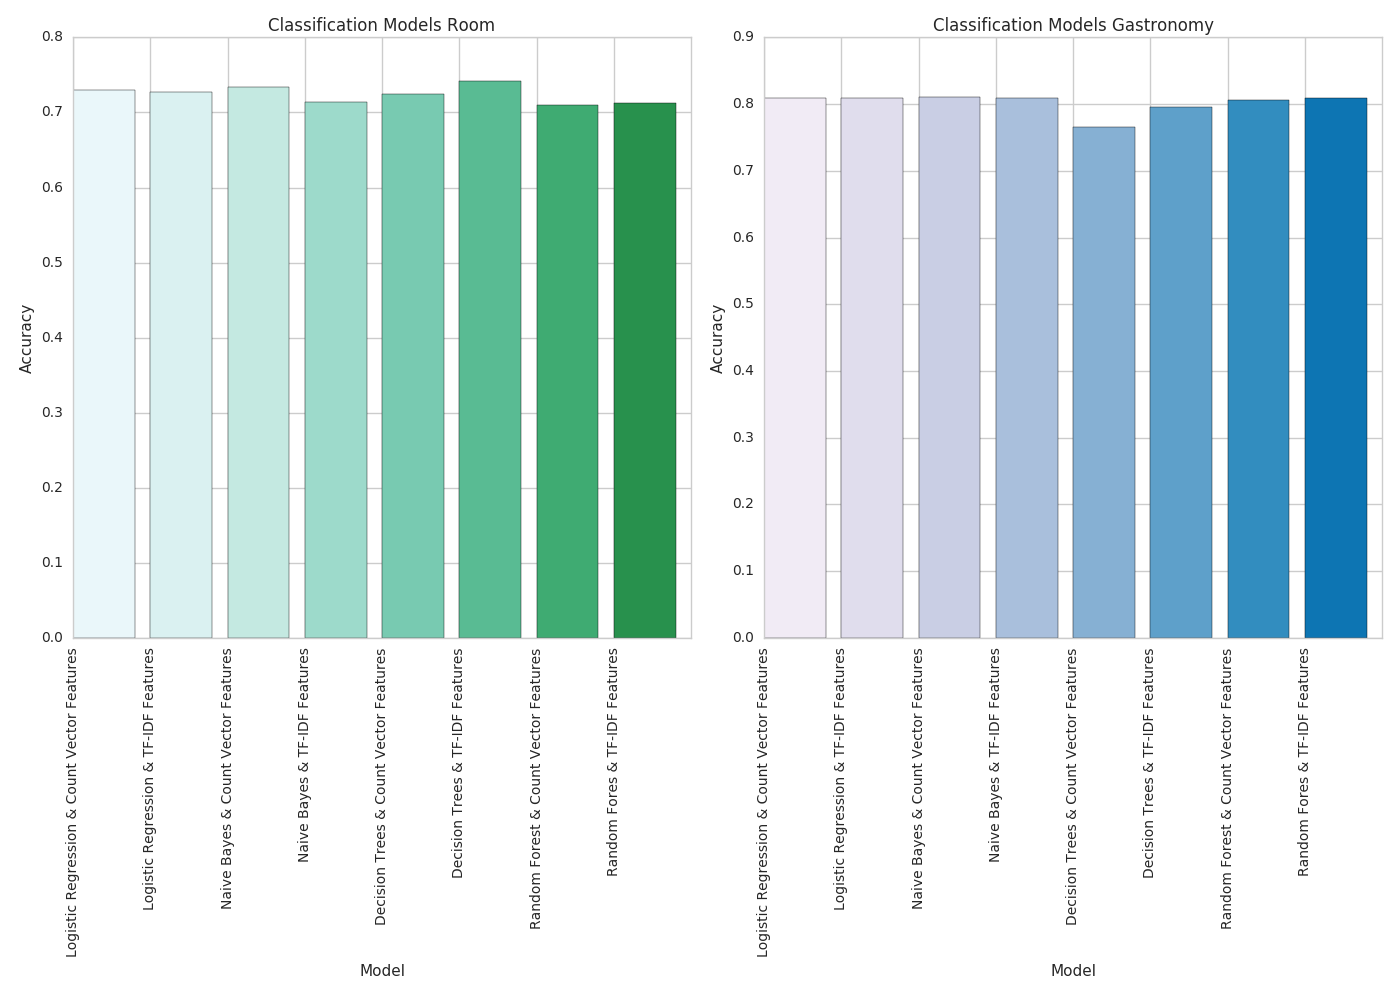

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,10))
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = [16,10]


# Lista con con nombres de los modelos
x = ['Logistic Regression & Count Vector Features', 'Logistic Regression & TF-IDF Features', \
           'Naive Bayes & Count Vector Features', 'Naive Bayes & TF-IDF Features', \
           'Decision Trees & Count Vector Features', 'Decision Trees & TF-IDF Features', \
           'Random Forest & Count Vector Features','Random Fores & TF-IDF Features']

x_pos = [i for i, _ in enumerate(x)]

# Gráfico modelos Room
plt.subplot(1, 2, 1) 
plt.bar(x_pos, accuracy_models_room, color=sns.color_palette("BuGn", 10))
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Classification Models Room')
plt.xticks(x_pos, x, rotation='vertical')
plt.tight_layout()

# Gráfico modelos Gastronmy
plt.subplot(1, 2, 2) 
plt.bar(x_pos, accuracy_models_gastronomy, color=sns.color_palette("PuBu", 10))
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Classification Models Gastronomy')
plt.xticks(x_pos, x, rotation='vertical')
plt.tight_layout()

display()
plt.gcf().clear()

#####5.5. Obtención del mejor modelo.

- Obtención del **modelo2**: mejor modelo para la predicción del Topic dentro del department **Room**.
- Obtención del **modelo3**: mejor modelo para la predicción del Topic dentro del department **Gastronomy**.

In [72]:
# Obtención mejor modelo Room
# Index max accuracy room
index_room = np.argmax(accuracy_models_room)

# Obtención mejor modelo
modelo2 = best_models_room[index_room]

# Obtención mejor modelo Gastronomia
# Index max accuracy room
index_gastronomy = np.argmax(accuracy_models_gastronomy)

# Obtención mejor modelo
modelo3 = best_models_gastronomy[index_gastronomy]

# Visualización
print ("Best Model for Topics in Room: " + str(objects[index_room]))
print ("Best Model for Topics in Gastronomy: " + str(objects[index_gastronomy]))

Best Model for Topics in Room: Decision Trees & TF-IDF Features
Best Model for Topics in Gastronomy: Naive Bayes & Count Vector Features

####6.0. Modelo 3: Sentiment Analysis.
A continuación de desarrollan los modelos para la predicción del campo "type". Los modelos no tendrán en cuenta las review negativas. Para la clasificiación previa de las reviews en positivas, negativas o neutras se utilizará el campo rating de la siguiente forma:

- Review Negativa: rating <= 30
- Review Neutra: rating == 40
- Review Positiva: rating == 50

#####6.1. Creación de dataframes balanceado con el mismo número de reviews positivas y neutras.

In [75]:
# Distribución reviews Postivas y Neutras
review_df_cleaned_filtered = reviews_df_cleaned.filter(reviews_df_cleaned.rating >= 40)
review_df_sent_grouped = review_df_cleaned_filtered.groupBy('rating').agg(count('rating').alias('count')).sort('rating')
review_df_sent_grouped.show(4)

# Creación dataframe reviews Neutral
review_df_neutral = review_df_cleaned_filtered.where(review_df_cleaned_filtered.rating == 40).limit(review_df_sent_grouped.collect()[0][1])

# Creación dataframe reviews Positive
review_df_positive = review_df_cleaned_filtered.where(review_df_cleaned_filtered.rating == 50).limit(review_df_sent_grouped.collect()[0][1])

# Unión dataframes
review_df_bias = review_df_neutral.union(review_df_positive)
review_df_bias.show(4)

print("review_df_bias: " + str(review_df_bias.count()))

+------+-----+
rating|count|
+------+-----+
 40.0| 1293|
 50.0| 2504|
+------+-----+

+--------------------+----------+-----------+------+
 review_text|department| topic|rating|
+--------------------+----------+-----------+------+
this is a quiet ...|Gastronomy| buffet| 40.0|
our third visit t...|Gastronomy| buffet| 40.0|
great location an...|Gastronomy| buffet| 40.0|
we stayed at the ...|Gastronomy|temperature| 40.0|
+--------------------+----------+-----------+------+
only showing top 4 rows

review_df_bias: 2586

El dataframe obtenido a emplear en el análisis de sentimiento consta de **7748** reviews positivas y neutras con el mismo número de ambos tipos.

#####6.2. Text Pre-processing, creación conjuntos entrenamiento y test:
Se realizan las operaciones de limpieza sobre el campo "review_text" y conversión del campo "rating". Finalmente se crean los conjuntos de entrenamiento y test.

In [78]:
# convert rating
def convert_rating(rating):
    #rating = int(rating)
    if rating ==40: return 0
    else: return 1

# udf
punct_remover = udf(lambda x: remove_punct(x))
rating_convert = udf(lambda x: convert_rating(x))

# Ejecución de la funciones punt_remover y rating_convert
review_df_bias = review_df_bias.select('review_text', rating_convert('rating'))

# Renombrado de columnnas
review_df_bias = review_df_bias.withColumnRenamed('<lambda>(rating)', 'rating') \
                     .drop('<lambda>(rating)') \
                     .limit(1000000)

# Conversión a Integer campo rating
review_df_bias = review_df_bias.withColumn("rating", review_df_bias["rating"].cast(IntegerType()))

review_df_bias.show(4)

# Creación de conjuntos entrenamiento y test
(train_set, test_set) = review_df_bias.randomSplit([0.8, 0.2], seed = 1234)
print("Training Dataset Count: " + str(train_set.count()))
print("Test Dataset Count: " + str(test_set.count()))

# Creación de lista para métricas
accuracy_models_sent =[]

# Creación de lista para mejores modelos
best_models_sent = []

+--------------------+------+
 review_text|rating|
+--------------------+------+
this is a quiet ...| 0|
our third visit t...| 0|
great location an...| 0|
we stayed at the ...| 0|
+--------------------+------+
only showing top 4 rows

Training Dataset Count: 2104
Test Dataset Count: 482

#####6.3. Empleo de un modelo tipo: Logistic Regression + TF-IDF Features:

In [80]:
# Tokenizer, Hashing, IDF
tokenizer = Tokenizer(inputCol="review_text", outputCol="words")
hashtf = HashingTF(numFeatures=2**16, inputCol="words", outputCol='tf')
idf = IDF(inputCol='tf', outputCol="features", minDocFreq=5) #minDocFreq: remove sparse terms
label_stringIdx = StringIndexer(inputCol = "rating", outputCol = "label")

# Pipeline
pipeline = Pipeline(stages=[tokenizer, hashtf, idf, label_stringIdx])

pipelineFitS1 = pipeline.fit(train_set)
train_df = pipelineFitS1.transform(train_set)
test_df = pipelineFitS1.transform(test_set)
train_df.show(5)

# Model
lrs1 = LogisticRegression(maxIter=100)
lrModelS1 = lrs1.fit(train_df)
predictionsS1 = lrModelS1.transform(test_df)

# Predictions
predictionsS1 \
    .select("review_text","rating","probability","label", "rawprediction","prediction") \
    .orderBy("probability", ascending=False) \
    .show(4, truncate = 50)

# Evaluación modelo
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
accuracy_sent = predictionsS1.filter(predictionsS1.label == predictionsS1.prediction).count() / float(test_set.count())
roc_auc = evaluator.evaluate(predictionsS1)
accuracy_models_sent.append(accuracy_sent)
best_models_sent.append(lrModelS1)

# print accuracy, roc_auc
print ("Accuracy Score: {0:.4f}".format(accuracy_sent))
print ("ROC-AUC: {0:.4f}".format(roc_auc))

+--------------------+------+--------------------+--------------------+--------------------+-----+
 review_text|rating| words| tf| features|label|
+--------------------+------+--------------------+--------------------+--------------------+-----+
a bit of winter s...| 1|[a, bit, of, wint...|(65536,[166,329,7...|(65536,[166,329,7...| 0.0|
a clean friendly ...| 0|[a, clean, friend...|(65536,[338,730,2...|(65536,[338,730,2...| 1.0|
a fabulous day ...| 1|[a, fabulous, , ,...|(65536,[1386,2406...|(65536,[1386,2406...| 0.0|
a fabulous hotel ...| 1|[a, fabulous, hot...|(65536,[5689,8436...|(65536,[5689,8436...| 0.0|
a fantastic place...| 1|[a, fantastic, pl...|(65536,[4488,4948...|(65536,[4488,4948...| 0.0|
+--------------------+------+--------------------+--------------------+--------------------+-----+
only showing top 5 rows

+--------------------------------------------------+------+----------------------------+-----+----------------------------------------+----------+
 review_text|rating| probability|label| rawprediction|prediction|
+--------------------------------------------------+------+----------------------------+-----+----------------------------------------+----------+
this was our first stay at the barcelo and the ...| 1| [1.0,9.945375858991606E-17]| 0.0| [36.84683887554214,-36.84683887554214]| 0.0|
firstly we would like to take a moment to thank...| 0| [1.0,7.631936951728985E-17]| 1.0| [37.11160490782871,-37.11160490782871]| 0.0|
pools were great rooms were always clean day ...| 0| [1.0,5.029973031289532E-17]| 1.0| [37.52853195837416,-37.52853195837416]| 0.0|
my boyfriend and i thoroughly enjoyed our half ...| 1|[1.0,3.5726407939528025E-17]| 0.0|[37.870641540369824,-37.870641540369824]| 0.0|
+--------------------------------------------------+------+----------------------------+-----+----------------------------------------+----------+
only showing top 4 rows

Accuracy Score: 0.7178
ROC-AUC: 0.7619

#####6.4. Empleo de un modelo tipo: Logistic Regression + Count Vector + TF-IDF Features

In [82]:

tokenizer = Tokenizer(inputCol="review_text", outputCol="words")
cv = CountVectorizer(vocabSize=2**16, inputCol="words", outputCol='cv')
idf = IDF(inputCol='cv', outputCol="features", minDocFreq=5) #minDocFreq: remove sparse terms
label_stringIdx = StringIndexer(inputCol = "rating", outputCol = "label")
# Pipeline
pipeline = Pipeline(stages=[tokenizer, cv, idf, label_stringIdx])

pipelineFitS2 = pipeline.fit(train_set)
train_df = pipelineFitS2.transform(train_set)
test_df = pipelineFitS2.transform(test_set)
train_df.show(5)

# Model
lrs2 = LogisticRegression(maxIter=100)
lrModelS2 = lrs2.fit(train_df)
predictionsS2 = lrModelS2.transform(test_df)

# Predictions
predictionsS2 \
    .select("review_text","rating","probability","label", "rawprediction","prediction") \
    .orderBy("probability", ascending=False) \
    .show(4, truncate = 50)

# Evaluación modelo
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
accuracy_sent = predictionsS2.filter(predictionsS2.label == predictionsS2.prediction).count() / float(test_set.count())
roc_auc = evaluator.evaluate(predictionsS2)
accuracy_models_sent.append(accuracy_sent)
best_models_sent.append(lrModelS2)

# print accuracy, roc_auc
print ("Accuracy Score: {0:.4f}".format(accuracy_sent))
print ("ROC-AUC: {0:.4f}".format(roc_auc))

+--------------------+------+--------------------+--------------------+--------------------+-----+
 review_text|rating| words| cv| features|label|
+--------------------+------+--------------------+--------------------+--------------------+-----+
a bit of winter s...| 1|[a, bit, of, wint...|(6103,[0,1,2,3,4,...|(6103,[0,1,2,3,4,...| 0.0|
a clean friendly ...| 0|[a, clean, friend...|(6103,[0,1,2,3,4,...|(6103,[0,1,2,3,4,...| 1.0|
a fabulous day ...| 1|[a, fabulous, , ,...|(6103,[0,1,2,3,4,...|(6103,[0,1,2,3,4,...| 0.0|
a fabulous hotel ...| 1|[a, fabulous, hot...|(6103,[0,1,2,3,5,...|(6103,[0,1,2,3,5,...| 0.0|
a fantastic place...| 1|[a, fantastic, pl...|(6103,[0,1,2,3,9,...|(6103,[0,1,2,3,9,...| 0.0|
+--------------------+------+--------------------+--------------------+--------------------+-----+
only showing top 5 rows

+--------------------------------------------------+------+---------------------------+-----+----------------------------------------+----------+
 review_text|rating| probability|label| rawprediction|prediction|
+--------------------------------------------------+------+---------------------------+-----+----------------------------------------+----------+
this hotel is traditionally furnished and is fa...| 1|[1.0,6.128012814763322E-17]| 0.0| [37.33107605728067,-37.33107605728067]| 0.0|
the room was not a refurbished onebut was still...| 1|[1.0,5.843524793476892E-17]| 0.0|[37.378612405601174,-37.378612405601174]| 0.0|
the hotel facilities were just fabulous nice b...| 1|[1.0,4.876133083605281E-17]| 0.0| [37.55959407604982,-37.55959407604982]| 0.0|
we stayed here mid august as a getaway from chi...| 1|[1.0,3.761180562098237E-17]| 0.0| [37.81921369349671,-37.81921369349671]| 0.0|
+--------------------------------------------------+------+---------------------------+-----+----------------------------------------+----------+
only showing top 4 rows

Accuracy Score: 0.7261
ROC-AUC: 0.7573

#####6.5. N-gram Implementation:

Desarrollo de modelos basado en unigrams, bigrams y trigrams.

In [84]:
# Función construir N-grams
def build_ngrams_wocs(inputCol=["review_text","rating"], n=3):
    tokenizer = [Tokenizer(inputCol="review_text", outputCol="words")]
    ngrams = [
        NGram(n=i, inputCol="words", outputCol="{0}_grams".format(i))
        for i in range(1, n + 1)
    ]

    cv = [
        CountVectorizer(vocabSize=5460,inputCol="{0}_grams".format(i),
            outputCol="{0}_tf".format(i))
        for i in range(1, n + 1)
    ]
    idf = [IDF(inputCol="{0}_tf".format(i), outputCol="{0}_tfidf".format(i), minDocFreq=5) for i in range(1, n + 1)]

    assembler = [VectorAssembler(
        inputCols=["{0}_tfidf".format(i) for i in range(1, n + 1)],
        outputCol="features"
    )]
    label_stringIdx = [StringIndexer(inputCol = "rating", outputCol = "label")]
    lr = [LogisticRegression(maxIter=100)]
    return Pipeline(stages=tokenizer + ngrams + cv + idf + assembler + label_stringIdx + lr)

trigramwocs_pipelineFit = build_ngrams_wocs().fit(train_set)
predictions_wocs = trigramwocs_pipelineFit.transform(test_set)
accuracy_sent = predictions_wocs.filter(predictions_wocs.label == predictions_wocs.prediction).count() / float(test_set.count())
roc_auc_wocs = evaluator.evaluate(predictions_wocs)
accuracy_models_sent.append(accuracy_sent)
best_models_sent.append(trigramwocs_pipelineFit)

# print accuracy, roc_auc
print ("Accuracy Score: {0:.4f}".format(accuracy_sent))
print ("ROC-AUC: {0:.4f}".format(roc_auc_wocs))

Accuracy Score: 0.7573
ROC-AUC: 0.8608

#####6.6. Comparación y evaluación de los modelos.

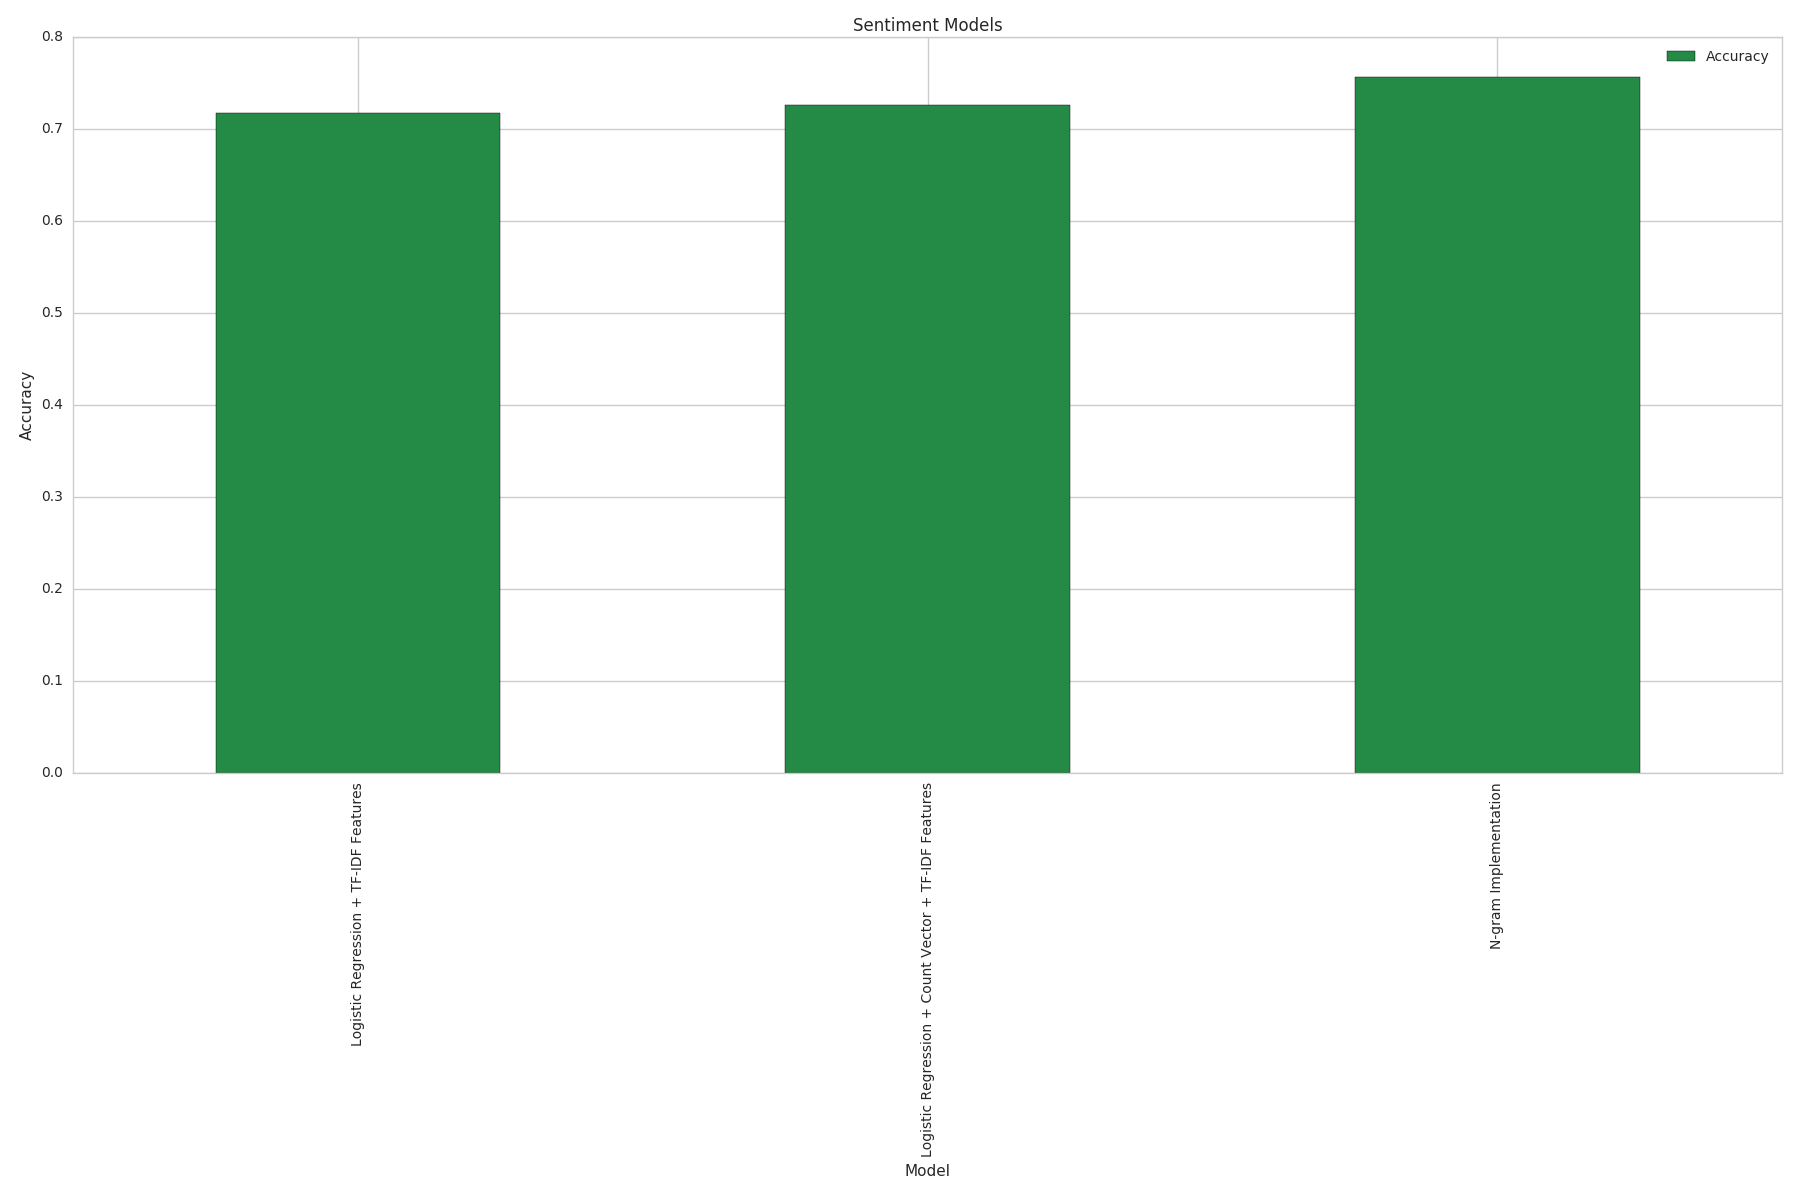

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = [18,12]


# Creación pandas dataframe models y ordenamiento
objects_sent = ['Logistic Regression + TF-IDF Features', 'Logistic Regression + Count Vector + TF-IDF Features', 'N-gram Implementation']
sent_models_df = pd.DataFrame({'models':objects_sent,'Accuracy':accuracy_models_sent})

# Gráfico de barras
x = np.arange(len(objects_sent))
 
sent_models_df.plot.bar(color=sns.color_palette("BuGn_r",3), align='center')
plt.xticks(x, objects_sent, rotation='vertical')
#plt.axis('tight')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Sentiment Models')
plt.tight_layout()

display()
plt.gcf().clear()

#####6.7. Obtención del mejor modelo.

In [88]:
objects_sent = ['Logistic Regression + TF-IDF Features', 'Logistic Regression + Count Vector + TF-IDF Features', 'N-gram Implementation']
# Index max accuracy
index_sent = np.argmax(accuracy_models_sent)

# Obtención mejor modelo
modelo4 = best_models_sent[index_sent]

# Visualización
print ("Best Model sentiment: " + str(objects_sent[index_sent]))

Best Model sentiment: N-gram Implementation

####7.0. Construcción de la respuestas/as para reviews sin respuesta no vistas por los modelos.

Mediante el empleo de los modelos 1, 2, 3 y 4 se proporcionará una respuesta para las 12 reviews seleccionas para el test final.

In [90]:
reviews_test_df.select('review_text').show(15, truncate=150)

+------------------------------------------------------------------------------------------------------------------------------------------------------+
 review_text|
+------------------------------------------------------------------------------------------------------------------------------------------------------+
my husband some friends and i had a blast in this perfect getaway spot we danced drank rested and chilled during our stay the service was great t...|
this stay has been absolutely amazing every single staff member is extremely considerate and helpful and they make you feel at home the food is de...|
my wife i stayed at this resort for our th anniversary and we were very happy with our experience the best advice i could give someone planning...|
this resort is huge it has golf course the resort has great gym many pool areas the beach is great with sun beds i was in all inclusive lots o...|
excellent hotel for relaxing and friendly atmosphere i will recommend this hotel to my family and friends the rooms and bathrooms need a little r...|
we stayed here for a week at may half term fab location min transfer rooms great but with adults and children a little small food selectio...|
two families with year old girls stayed here for days we had so much fun food drinks pools beach spa excursions from the hotel the adult ...|
my wife and l loved this resort the stall treated us like family the pool was wonderful and we spent many hours relaxing the beach was gorgeous ...|
service was excellent and they definitely know how to pour a strong drink food was average and the train to other parts of the property took a lon...|
my husband and i and a big group of friend went last past week from sept to barcelo bavaro beach adults only i love the nice resort we are p...|
just had a good holiday at this hotel rooms lovely and spacious staff very helpful and pleasant pool area large and loads of sunbeds entertainmen...|
this visit certainly surpassed the last at last they have put a kettle in the room plus bottles of water we also had a welcome back cava and ...|
+------------------------------------------------------------------------------------------------------------------------------------------------------+

#####7.1. Predicción campo "department" mediante empleo del Modelo 1:

######7.1.1 Procesamiento del texto:

Transformaciones necesarias en las reviews de test final (Count Vector Features o TF-IDF Features) para poder aplicar el modelo1.

In [93]:
# Fit and Transform
if index % 2 == 0:
  dataset_department_test = pipelineFitCV_department.transform(reviews_test_df)
  dataset_department_test.show(4)
else:
  dataset_department_test = pipelineFitIDF_department.transform(reviews_test_df)
  dataset_department_test.show(4)  

+--------------------+----------+-----+------+--------------------+--------------------+--------------------+-----+
 review_text|department|topic|rating| words| filtered| features|label|
+--------------------+----------+-----+------+--------------------+--------------------+--------------------+-----+
my husband some f...| Room| bed| 50.0|[my, husband, som...|[husband, friends...|(2593,[0,1,5,10,1...| 1.0|
this stay has bee...| Room| bed| 50.0|[this, stay, has,...|[stay, absolutely...|(2593,[0,2,6,7,16...| 1.0|
my wife i staye...| Room| room| 50.0|[my, wife, i, sta...|[wife, stayed, at...|(2593,[4,6,16,35,...| 1.0|
this resort is hu...| Room| room| 50.0|[this, resort, is...|[huge, golf, cour...|(2593,[5,8,10,26,...| 1.0|
+--------------------+----------+-----+------+--------------------+--------------------+--------------------+-----+
only showing top 4 rows

######7.2.2 Predicción campo "department":

Empleo del modelo 1 anteriormente obtenido para predecir el campo "department" a partir del campo review_text:

In [95]:
# Empleo del modelo
predictions_department_test = modelo1.transform(dataset_department_test)
predictions_department_test.select('prediction').distinct().count()

# Obtención de las predicciones
predictions_department_test \
           .select("review_text", "probability", "prediction") \
           .orderBy("probability", ascending=False) \
           .show(4, truncate = 50)

# Comprobación número deparments
print("Distinct departments: " + str(predictions_department_test.select('prediction').distinct().count()))

+--------------------------------------------------+--------------------------------------------------+----------+
 review_text| probability|prediction|
+--------------------------------------------------+--------------------------------------------------+----------+
two families with year old girls stayed here...|[0.6779888556914068,0.3220017744582147,9.369850...| 0.0|
service was excellent and they definitely know ...|[0.6779888556914068,0.3220017744582147,9.369850...| 0.0|
this visit certainly surpassed the last at l...|[0.631824869723236,0.3681654905361458,9.6397406...| 0.0|
just had a good holiday at this hotel rooms lov...|[0.6071364311902638,0.3928538548953117,9.713914...| 0.0|
+--------------------------------------------------+--------------------------------------------------+----------+
only showing top 4 rows

Distinct departments: 2

######7.1.3. Transformación de la columna prediction (label predecida) a su correspondiente department a partir de la tabla code_label_department_df:

In [97]:
predictions_department_test = predictions_department_test.join(code_label_department_df, code_label_department_df.label == predictions_department_test.prediction) \
                                                            .select(predictions_department_test.review_text, code_label_department_df.department) \
                                                            .withColumn('review_text', trim(col('review_text')))

predictions_department_test.show(15, truncate=100)

# Filtrado reviews Room y Gastronomy
predictions_room_test = predictions_department_test.filter(predictions_department_test.department == 'Room')
predictions_gastronomy_test = predictions_department_test.filter(predictions_department_test.department == 'Gastronomy')

+----------------------------------------------------------------------------------------------------+----------+
 review_text|department|
+----------------------------------------------------------------------------------------------------+----------+
this visit certainly surpassed the last at last they have put a kettle in the room plus bott...|Gastronomy|
just had a good holiday at this hotel rooms lovely and spacious staff very helpful and pleasant ...|Gastronomy|
my husband and i and a big group of friend went last past week from sept to barcelo bavaro ...|Gastronomy|
service was excellent and they definitely know how to pour a strong drink food was average and t...|Gastronomy|
my wife and l loved this resort the stall treated us like family the pool was wonderful and we ...|Gastronomy|
two families with year old girls stayed here for days we had so much fun food drinks pools...|Gastronomy|
we stayed here for a week at may half term fab location min transfer rooms great but with ...| Room|
this stay has been absolutely amazing every single staff member is extremely considerate and help...| Room|
my husband some friends and i had a blast in this perfect getaway spot we danced drank rested an...| Room|
excellent hotel for relaxing and friendly atmosphere i will recommend this hotel to my family an...| Room|
this resort is huge it has golf course the resort has great gym many pool areas the beach is ...| Room|
my wife i stayed at this resort for our th anniversary and we were very happy with our experi...| Room|
+----------------------------------------------------------------------------------------------------+----------+

#####7.2. Predicción campo "topic" mediante el empleo de los modelos 2 y 3 obtenidos anteiormente:

- Mediante el modelo 2 se obtienen las predicciones para los topics pertenecientes al department Room.
- Mediante el modelo 3 se obtienen las predicciones para los topics pertenecientes al department Gastronomy.

In [99]:
index_room

Out[ 117 ]: 5

######7.2.1 Procesamiento del texto:
Transformaciones necesarias (Count Vector Features) para poder aplicar el modelo2.

In [101]:
# Room
if index_room % 2 == 0:
  dataset_topic_room_test = pipelineFitCV_room.transform(predictions_room_test)
  dataset_topic_room_test.show(4)
else:
  dataset_topic_room_test = pipelineFitIDF_room.transform(predictions_room_test)
  dataset_topic_room_test.show(4)

# Gastronomy
if index_gastronomy % 2 == 0:
  dataset_topic_gastronomy_test = pipelineFitCV_gastronomy.transform(predictions_gastronomy_test)
  dataset_topic_gastronomy_test.show(4)
else:
  dataset_topic_gastronomy_test = pipelineFitIDF_gastronomy.transform(predictions_gastronomy_test)
  dataset_topic_gastronomy_test.show(4)

+--------------------+----------+--------------------+--------------------+--------------------+--------------------+
 review_text|department| words| filtered| rawFeatures| features|
+--------------------+----------+--------------------+--------------------+--------------------+--------------------+
we stayed here fo...| Room|[we, stayed, here...|[stayed, week, at...|(10000,[87,165,54...|(10000,[87,165,54...|
this stay has bee...| Room|[this, stay, has,...|[stay, absolutely...|(10000,[1,157,185...|(10000,[1,157,185...|
my husband some f...| Room|[my, husband, som...|[husband, friends...|(10000,[182,277,4...|(10000,[182,277,4...|
excellent hotel f...| Room|[excellent, hotel...|[excellent, relax...|(10000,[1043,1618...|(10000,[1043,1618...|
+--------------------+----------+--------------------+--------------------+--------------------+--------------------+
only showing top 4 rows

+--------------------+----------+--------------------+--------------------+--------------------+
 review_text|department| words| filtered| features|
+--------------------+----------+--------------------+--------------------+--------------------+
this visit certai...|Gastronomy|[this, visit, cer...|[visit, certainly...|(1744,[0,1,4,5,7,...|
just had a good h...|Gastronomy|[just, had, a, go...|[just, good, at, ...|(1744,[0,1,2,3,5,...|
my husband and i ...|Gastronomy|[my, husband, and...|[husband, big, gr...|(1744,[0,1,7,15,2...|
service was excel...|Gastronomy|[service, was, ex...|[service, excelle...|(1744,[0,3,11,19,...|
+--------------------+----------+--------------------+--------------------+--------------------+
only showing top 4 rows

######7.2.2 Predicción campo "topic":

In [103]:
# Empleo del modelo 2
predictions_room_test_df = modelo2.transform(dataset_topic_room_test)
predictions_room_test_df.select('prediction').distinct().count()

# Obtención de las predicciones
predictions_room_test_df \
           .select("review_text", "department", "probability", "prediction") \
           .orderBy("probability", ascending=False) \
           .show(4, truncate = 50)

# Empleo del modelo 3
predictions_gastronomy_test_df = modelo3.transform(dataset_topic_gastronomy_test)
predictions_gastronomy_test_df.select('prediction').distinct().count()

# Obtención de las predicciones
predictions_gastronomy_test_df \
           .select("review_text", "department", "probability", "prediction") \
           .orderBy("probability", ascending=False) \
           .show(4, truncate = 50)

+--------------------------------------------------+----------+--------------------------------------------------+----------+
 review_text|department| probability|prediction|
+--------------------------------------------------+----------+--------------------------------------------------+----------+
my wife i stayed at this resort for our th ...| Room|[0.8948412698412699,0.030753968253968252,0.0744...| 0.0|
we stayed here for a week at may half term fab...| Room|[0.8948412698412699,0.030753968253968252,0.0744...| 0.0|
excellent hotel for relaxing and friendly atmos...| Room|[0.8948412698412699,0.030753968253968252,0.0744...| 0.0|
this resort is huge it has golf course the re...| Room|[0.6470588235294118,0.226890756302521,0.1260504...| 0.0|
+--------------------------------------------------+----------+--------------------------------------------------+----------+
only showing top 4 rows

+--------------------------------------------------+----------+--------------------------------------------------+----------+
 review_text|department| probability|prediction|
+--------------------------------------------------+----------+--------------------------------------------------+----------+
just had a good holiday at this hotel rooms lov...|Gastronomy|[0.9999999850042647,1.499542946658866E-8,3.0564...| 0.0|
two families with year old girls stayed here...|Gastronomy|[0.9999989055917722,1.0680815843077435E-6,2.632...| 0.0|
my husband and i and a big group of friend went...|Gastronomy|[0.9999942572119829,5.741605205309906E-6,1.1828...| 0.0|
this visit certainly surpassed the last at l...|Gastronomy|[0.9996368375695909,3.5355874187742296E-4,9.603...| 0.0|
+--------------------------------------------------+----------+--------------------------------------------------+----------+
only showing top 4 rows

######7.3.3. Transformación de la columna prediction (label predecida) a su correspondiente topic a partir de la tabla code_label_room_df y code_label_gastronomy_df:

In [105]:
# Room
predictions_room_labeled = predictions_room_test_df.join(code_label_room_df, code_label_room_df.label == predictions_room_test_df.prediction) \
                                                            .select(predictions_room_test_df.review_text, predictions_room_test_df.department, code_label_room_df.topic)

# Gastronomy
predictions_gastronomy_labeled = predictions_gastronomy_test_df.join(code_label_gastronomy_df, code_label_gastronomy_df.label == predictions_gastronomy_test_df.prediction) \
                                                            .select(predictions_gastronomy_test_df.review_text, predictions_gastronomy_test_df.department, \
                                                            code_label_gastronomy_df.topic)

predictions_topic_final = predictions_room_labeled.union(predictions_gastronomy_labeled)

predictions_topic_final.show(12, truncate=80)

+--------------------------------------------------------------------------------+----------+------+
 review_text|department| topic|
+--------------------------------------------------------------------------------+----------+------+
we stayed here for a week at may half term fab location min transfer roo...| Room| room|
this stay has been absolutely amazing every single staff member is extremely ...| Room| room|
my husband some friends and i had a blast in this perfect getaway spot we da...| Room| room|
excellent hotel for relaxing and friendly atmosphere i will recommend this h...| Room| room|
this resort is huge it has golf course the resort has great gym many pool ...| Room| room|
my wife i stayed at this resort for our th anniversary and we were very h...| Room| room|
this visit certainly surpassed the last at last they have put a kettle in ...|Gastronomy|buffet|
just had a good holiday at this hotel rooms lovely and spacious staff very he...|Gastronomy|buffet|
my husband and i and a big group of friend went last past week from sept ...|Gastronomy|buffet|
service was excellent and they definitely know how to pour a strong drink fo...|Gastronomy|buffet|
my wife and l loved this resort the stall treated us like family the pool w...|Gastronomy|buffet|
two families with year old girls stayed here for days we had so much fu...|Gastronomy|buffet|
+--------------------------------------------------------------------------------+----------+------+

#####7.4. Predicción campo "type" (Sentimiento) mediante el empleo del Modelo 3:

Empleo del modelo 3 anteriormente desarrollado para predecir el campo "type" a partir del campo review_text:

######7.4.1. Empleo del modelo 3 para predecir el campo "type":

In [108]:
# Empleo Modelo 3
predictions_department_topic_sent = trigramwocs_pipelineFit.transform(predictions_topic_final)


# Obtenicón predicciones
predictions_department_topic_sent.select("review_text", "department", "topic", "prediction").show(n = 10, truncate = 30)

+------------------------------+----------+------+----------+
 review_text|department| topic|prediction|
+------------------------------+----------+------+----------+
we stayed here for a week a...| Room| room| 1.0|
this stay has been absolute...| Room| room| 0.0|
my husband some friends and...| Room| room| 0.0|
excellent hotel for relaxin...| Room| room| 1.0|
this resort is huge it has...| Room| room| 0.0|
my wife i stayed at this ...| Room| room| 0.0|
this visit certainly surpas...|Gastronomy|buffet| 1.0|
just had a good holiday at ...|Gastronomy|buffet| 1.0|
my husband and i and a big ...|Gastronomy|buffet| 1.0|
service was excellent and t...|Gastronomy|buffet| 1.0|
+------------------------------+----------+------+----------+
only showing top 10 rows

######7.4.3. Transformación de la columna prediction (label predecida) a su correspondiente type mediante la función reconvert_rating:

In [110]:
# convert rating
def reconvert_rating(prediction):
    if prediction == 0.0: return 'Neutral'
    else: return 'Positive'
    
# Ejecución de la función
rating_reconvert = udf(lambda x: reconvert_rating(x))

# apply to review raw data
predictions_Final = predictions_department_topic_sent.select("review_text", "department", "topic", rating_reconvert('prediction'))

# Renombrado de columnnas
predictions_Final = predictions_Final.withColumnRenamed('<lambda>(prediction)', 'type')\
                     .drop('<lambda>(prediction)') \
                     .limit(1000000)


predictions_Final.show(10)
#display(predictions_department_sentiment)

# Guardado del dataframe en tabla temporal
spark.catalog.dropTempView("table3")
predictions_Final.createTempView('table3')

# Escritura del dataframe en un archivo csv
predictions_Final.coalesce(1).write.mode('overwrite') \
                                            .format('csv').option("header", "true") \
                                            .option("delimiter", ",").save('/FileStore/tables/resultados_topic.csv')

+--------------------+----------+------+--------+
 review_text|department| topic| type|
+--------------------+----------+------+--------+
we stayed here fo...| Room| room|Positive|
this stay has bee...| Room| room| Neutral|
my husband some f...| Room| room| Neutral|
excellent hotel f...| Room| room|Positive|
this resort is hu...| Room| room| Neutral|
my wife i staye...| Room| room| Neutral|
this visit certai...|Gastronomy|buffet|Positive|
just had a good h...|Gastronomy|buffet|Positive|
my husband and i ...|Gastronomy|buffet|Positive|
service was excel...|Gastronomy|buffet|Positive|
+--------------------+----------+------+--------+
only showing top 10 rows

#####7.4. Construcción de las respuestas:

Tras haber obtenido el "department", el "topic" y el "type" para cada una de las reviews que no tienen respuesta mediante los modelos anteriores 1, 2 y 3. A continuación se ha desarrollado una función para proporcionar una respuesta completa a cada review basándose en las respuestas encontradas en las guía de estilo en función de los campos "department", "topic" y "type".

In [112]:
# 1. Carga de las diferentes respuetas
respuestas = spark.sql("""
select t4.department, t4.type, t4.topic, concat(t4.begin_text, '', t4.body_text, '', t4.close_text) as answer, t2.review_text from table4 as t4
left join table3 as t2 where t2.type=t4.type and t2.department=t4.department and t2.topic=t2.topic
order by rand()
""")
respuestas.show()

# Guardado de respuestas en csv in csv
respuestas.coalesce(1).write.mode('overwrite').format('csv').option("header", "true").option("delimiter", ",").save('/FileStore/tables/all_respuestas.csv')
# How exists all_respuestas.csv we only have to load
respuestas = spark.read.format('com.databricks.spark.csv').options(inferSchema=True, delimiter = ',', nullValue='NA', header=True, multiLine=True, encoding='UTF-8').load('/FileStore/tables/all_respuestas.csv')
#respuestas2 = respuestas.filter("department='Empleado' and type='Positivo' and topic='gratitude'")
#respuestas2.show(5)
#respuestas.show()

# Creación de diccionario con posibles respuetas
# The structure is answers = {'department_type': {'res':[res1, res2, res3, ...., resn]}}
answers = {}
for a in respuestas.collect():
  final_key = a.department.strip() + "_" + a.type.strip() + "_" + a.topic.replace(' ','')
  if(answers.has_key(final_key)):
    if(answers[final_key].has_key('res')):
      answers[final_key]['res'].append(a.answer)
  else:
    answers[final_key] = {'res': []}

#print("RESULTADOS:")
#for key in answers.keys():
#  print(key)
#  for key2 in answers[key].keys():
#    print("---- " + key2)

# Print array answers. Only required to show information.
print("Resultados: ")
for d_id, d_info in answers.items():
  print("\nDEPARTMENT_TYPE:", d_id)
  if(d_info.has_key('res')):
    print("RESULTS COUNT:", len(d_info['res']))
  print("RESULTS: ", d_info)

# TEST
# Función random answer
from random import randrange, uniform  # Required to use randrange function
#print("TEST PREDICT ANSWER TO EMPLEADO, POSITIVO AND GRATITUDE:")
#if(answers.has_key('Empleado_Positivo_gratitude')):
#  total = len(answers['Empleado_Positivo_gratitude']['res'])
#  resp_random = randrange(0,total)
#  print("--------------------------")
#  print("--------------------------")
#  print("La respuesta es: " + answers['Empleado_Positivo_gratitude']['res'][resp_random])
#else:
#  print("No hay respuestas para el departamento Empleado")
  

# 2. Carga de reviews
reviews_test = spark.read.format('com.databricks.spark.csv')\
.options(inferSchema=True, delimiter = ',', nullValue='NA', header=True, multiLine=True, encoding='UTF-8')\
.load('/FileStore/tables/resultados_topic.csv/*')
print("List reviews with predictive department, type and topic:")
reviews_test.show(2)
print("total:" + str(reviews_test.count()))

# Function required to obtain random answer
# @param - text department
# @param - text type sentiment
# @param - text topic
# return - random answer in function len answer
def getAnswer(department, type, topic):
  key = department + "_" + type + "_" + topic.replace(' ','')
  if(answers.has_key(key)):
    total = len(answers[key]['res'])
    resp_random = randrange(0,total)
    return answers[key]['res'][resp_random]
  else:
    return "'"+department + "', '" + type + "', '" + topic + "'"

from pyspark.sql.types import *
# Define schema
respSchema = StructType([StructField("review_text", StringType()), StructField("department", StringType()), StructField("topic", StringType()), StructField("type", StringType()), StructField("random_answer", StringType())])
test = reviews_test.rdd.map(lambda x:(x[0],x[1],x[2],x[3],getAnswer(x[1].strip(),x[3].strip(),x[2].strip()))).toDF(respSchema)
test.printSchema()

test = test.withColumnRenamed('review_text', 'review') \
            .withColumnRenamed('department', 'departamento') \
            .withColumnRenamed('topic', 'tema') \
            .withColumnRenamed('type', 'sentimiento') \
            .withColumnRenamed('random_answer', 'respuesta sugerida')

display(test.take(20))

review,departamento,tema,sentimiento,respuesta sugerida
we stayed here for a week at may half term fab location min transfer rooms great but with adults and children a little small food selection was great something for everyone the restaurant could get busy at times but nothing too bad all entertainment was good our children especially enjoyed the mini and maxi clubs pools are salt water one was heated the others a bit chilly beach shops restaurants and bars mins walk away which is perfect there are little parks for children close by too would definitely recommend this hotel,Room,room,Positive,"firstly we would like to thank you for choosing our barcelo xxx hotel for your holidays in xx and for the review you shared on xxx, all of your kind words about your stay with us are great to hear we are also very pleased to read your complete satisfaction with the comfort of the room we accommodated you in and are grateful for your highlight on the beauty of our accommodations aimed at guaranteeing a memorable stay in our hotel. thank you again for this heartwarming review of your stay with us, we look forward to your next visit."
this stay has been absolutely amazing every single staff member is extremely considerate and helpful and they make you feel at home the food is delicious as well i even love the bed thank you jesus peguero for your wonderful courtesy,Room,room,Neutral,"we greatly appreciate the time you spent to review your recent experience in our hotel, at barcelo we always strive to exceed guests' expectations and your comments will help our teams reaching that goal. we are very pleased to read that you did like the room we accommodated you in and that you found it to be clean and comfortable at all times. thank you again for choosing our hotel on this occasion and for the courtesy of your time, even though we understand that this was not the best fit for your travel party, therefore we strongly encourage you for a future occasion to contact our call center from where our agents will be able to give you all the relevant information to make sure that you book the barcelo hotel that can make all your holiday wishes come true."
my husband some friends and i had a blast in this perfect getaway spot we danced drank rested and chilled during our stay the service was great the space was perfect and the food was very fullfillin we could enjoy the best of both worlds we relaxed by the adults only pool or by the family bar in the pool on the palace hotel either way there s always something to do if not the beds were so comfy that a nap could always be a good option other activities transportation and yours were very reliable and puntual our concierge agent emma provided us with great options for our stay the boogies and coco bongo are a must,Room,room,Neutral,"firstly we thank you for making our barcelo xxx your choice hotel for a second visit to xxx, although we regret that we fell a little short of your expectations this time around. we are very pleased to read that you did like the room we accommodated you in and that you found it to be clean and comfortable at all times. thank you once again for making us your choice hotel and for your constructive critics, we certaily look forward to serving you again and to have the opportunity to exceed you expectations in a not too distant future."
excellent hotel for relaxing and friendly atmosphere i will recommend this hotel to my family and friends the rooms and bathrooms need a little remodeling but are very nicely decorated and clean,Room,room,Positive,"thank you very much for leaving these wonderful comments on tripadvisor, we are delighted that you enjoyed your stay among us. thank you for pointing out the beauty and comfort of our newly refurbished accommodations designed to make our guests' stay as comfortable as possible with design furniture and the latest technology, being fully aware that an attractive accommodation plays a key role to our guests' overall holiday experience, w